## Model Building - P3HT

**Authors**: Rahul Venkatesh

**Date Created** : 10/31/2021



This notebook contains all the code required to perform the following : 

1.Final model building from JMP on sklearn and Hyper parameter optimization

2.Addition of Prediction Intervals

3.SHAP model interpretation

## Importing Necessary Python Libraries

In [17]:
# %% Import libraries
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns


#from modules.utils import Plots

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV, Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, f_regression
import warnings 
from sklearn import metrics
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

pd.set_option('max_columns', 200)
pd.set_option('max_rows', 500)

In [18]:
# %% Figure plotting information 
def fig_fmt():
    font = {'family': 'Arial',
            #'color':  'darkred',
    #         'weight': 'bold',
            'size': 12,
            }
    plt.rc('font', **font)
    plt.rc('axes', linewidth = '1')
    plt.rc('xtick', labelsize = 12)
    plt.rc('ytick', labelsize = 12)
    plt.rcParams['xtick.major.size'] = 8
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.size'] = 6
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 8
    plt.rcParams['ytick.minor.size'] = 6
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

#Set font options
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

## Loading Training and Testing Data for P3HT

Using all features after data cleaning. Did not do feature selection

In [19]:
df_train = pd.read_excel('P3HT_Cleaned_Train.xlsx')
print(df_train.shape)
df_train

(109, 16)


,Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,Channel Length (um),Channel Width (mm),Aged,OFET Configuration_BGBC,OFET Configuration_BGTC,Deposition Method_DIPPED,Deposition Method_DROPPED,Deposition Method_SPUN,Mobility (cm^2/V-s)
0,15.4000,1.500000,10.0,487.000,3.352462,1,1,20.0,10.0,1,1,0,0,0,1,0.001680
1,163.2000,2.400000,3.5,384.000,4.042153,0,0,30.0,0.5,1,0,1,0,0,1,0.003050
2,47.7000,1.987500,3.5,334.000,3.629738,0,1,50.0,2.0,0,1,0,0,0,1,0.001160
3,48.9600,2.040000,2.0,418.000,2.758079,1,0,20.0,0.8,1,1,0,0,1,0,0.033500
4,70.0000,2.000000,3.5,384.000,4.042153,0,0,30.0,0.5,1,0,1,0,0,1,0.001020
5,70.0000,2.000000,3.5,384.000,4.042153,0,0,30.0,0.5,1,0,1,0,0,1,0.001350
6,37.7400,1.480000,1.0,487.000,3.352462,0,0,7.5,1.0,0,1,0,0,0,1,0.023000
7,47.7000,1.987500,4.0,334.000,3.629738,0,0,50.0,2.0,0,1,0,0,0,1,0.007190
8,5.1000,1.000000,15.0,334.000,3.629738,1,0,100.0,148.5,0,0,1,0,0,1,0.000046
9,37.7400,1.480000,1.0,487.000,3.352462,0,0,7.5,1.0,0,1,0,1,0,0,0.002400


In [20]:
df_test = pd.read_excel('P3HT_Cleaned_Test.xlsx')
print(df_test.shape)
df_test

(37, 16)


,Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,Channel Length (um),Channel Width (mm),Aged,OFET Configuration_BGBC,OFET Configuration_BGTC,Deposition Method_DIPPED,Deposition Method_DROPPED,Deposition Method_SPUN,Mobility (cm^2/V-s)
0,62.050,1.7000,5.0,334.000,3.629738,1,0,5.0,40.0,0,1,0,0,0,1,0.009080
1,47.700,1.9875,4.0,334.000,3.629738,0,0,50.0,2.0,0,1,0,0,0,1,0.015300
2,10.800,1.2000,5.0,334.000,3.629738,1,0,5.0,40.0,0,1,0,0,0,1,0.000356
3,76.000,1.7000,10.0,487.000,3.352462,1,1,2.0,10.0,1,1,0,0,0,1,0.137800
4,25.650,1.3500,15.0,334.000,3.629738,1,0,100.0,148.5,0,0,1,1,0,0,0.010600
5,52.000,2.3000,10.0,334.000,3.629738,1,1,20.0,10.0,1,1,0,0,1,0,0.066200
6,47.700,1.9875,3.0,334.000,3.629738,0,0,200.0,0.5,0,1,0,0,0,1,0.003810
7,60.750,2.2500,1.0,334.000,3.629738,0,0,20.0,9.0,0,1,0,1,0,0,0.017000
8,76.000,1.7000,10.0,487.000,3.352462,1,1,20.0,10.0,1,1,0,0,0,1,0.122600
9,91.481,2.2700,5.0,403.480,2.649001,0,0,50.0,2.0,0,1,0,0,0,1,0.000254


The following lines of code are to check if the train and test datasets have the columns in the same order. This will be important at later steps.

In [7]:
df_train.columns==df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

If the test and train datasets do not have the columns in the same order, the following code block should make sure that the column indexes/order is the same

In [8]:
####code make sure the column order are the same
df_test=df_test.reindex(columns=df_train.columns)
df_train.columns==df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [21]:
 

#making X and Y dataframes for train and test
df_X_train = df_train.iloc[:,0:-1].copy() 
df_X_test = df_test.iloc[:,0:-1].copy()
df_Y_train = df_train.iloc[:,-1].copy()
df_Y_test = df_test.iloc[:,-1].copy()

#making X and Y matrices for train and test
X_train = df_X_train.values
X_test = df_X_test.values
Y_train = df_Y_train.values
Y_test = df_Y_test.values

#Y_train = Y_train.flatten()
#Y_test = Y_test.reshape(368,)

print(df_X_train.shape)
print(df_X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(109, 15)
(37, 15)
(109,)
(37,)


## Model Building and Hyper Parameter Optimization

JMP auto ML recommended that the neural boosted model is the best architecture for our data. Hence we will build the analogue for the neural boosted model in sklearn which is the MLP regressor.

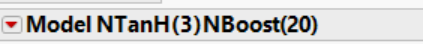
TanH is the activation function <br>
3 layers: 1 input, 1 hidden, 1 output <br>
3 nodes * 20 boosted model: 60 neurons in the hidden layer <br>

Generate the python code for the neural boosted model on jmp and we will use this information to start the model building

In [22]:
#Firstget a list of neuron names
func_list=[]
for i in range(1,61):
    func_list.append('H1_'+str(i))

We need to process the python code in Excel to better extract the weights and coeffs.
Copy the following code to Excel (everything from H1_1=... to H1_60=...):
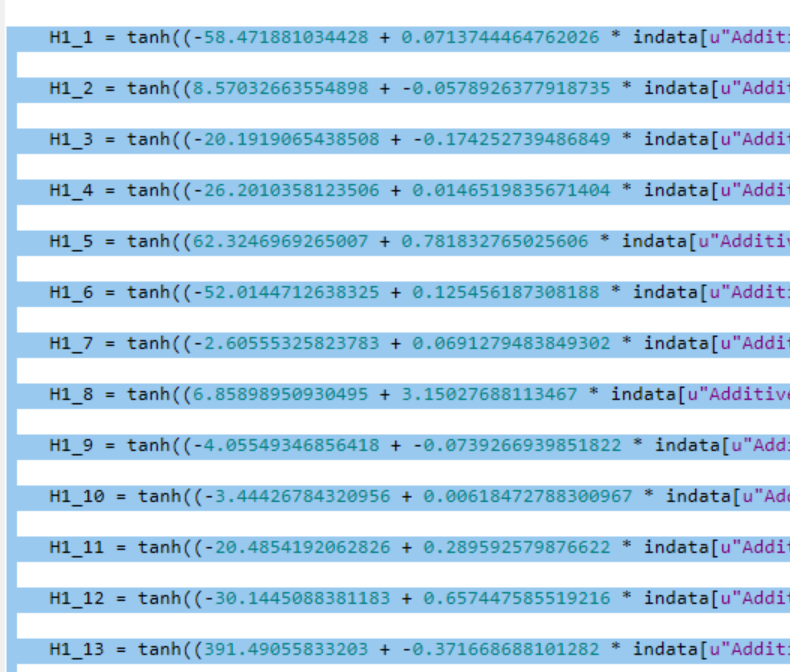
Looks like this in Excel:
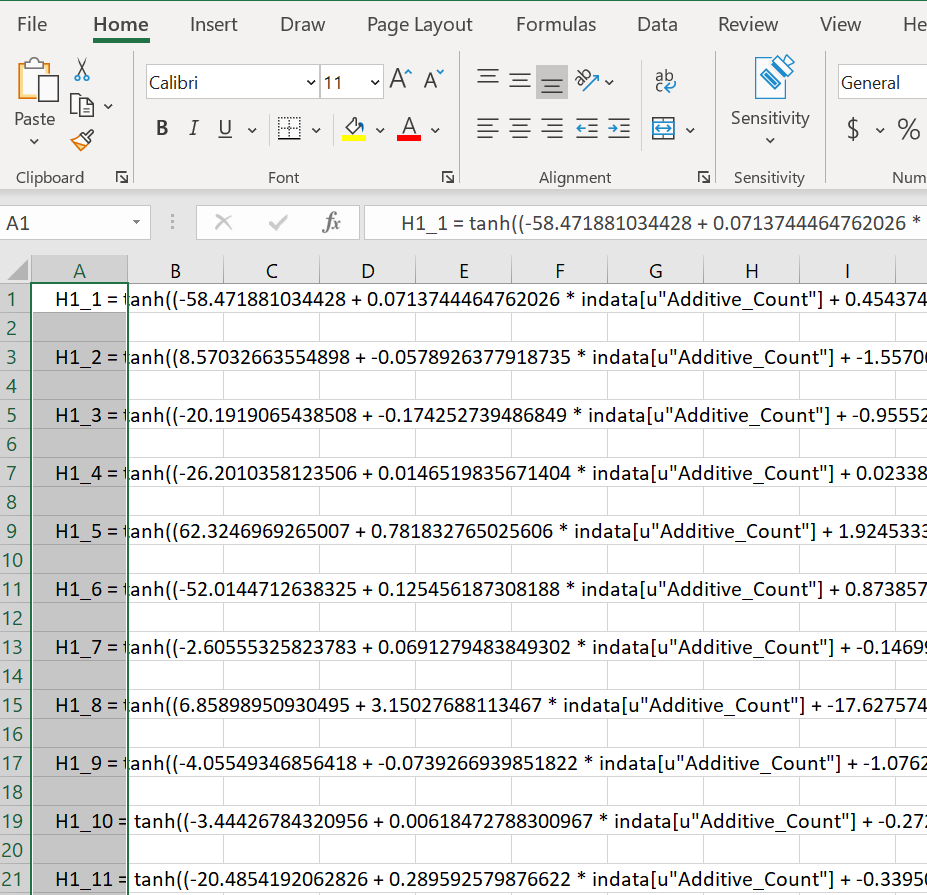
Make sure the first column is selected and go to HOME > **find & select > Go To Special > Select Blanks**, then delect the blank rows by right clicking on one of the selected blanks. selecte Delete and then shift cells up and click Ok
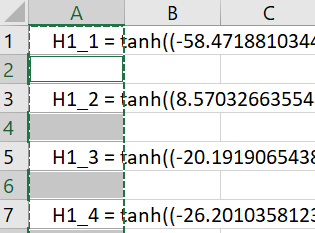
Make sure the first column is selected and go to DATA >**Text to columns > select Delimited > click next > in Other box put an '=' > Finish**, the functions split to two columns: name and the expression. Insert a new column after the first, select the first column and go to **Text to columns > Delimited > Space > Finish**.
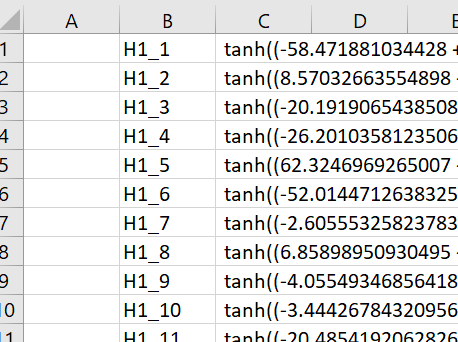
In column D1, fill in *=B1&"='"&C1&"'"*, double click on the right bottom of the cell to auto fill all the cells in column D.
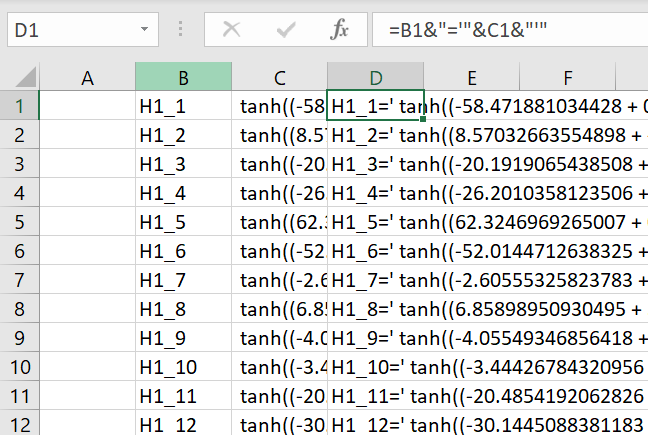
Copy column D to the next block

In [23]:
H1_1=' tanh((2.2286271727685 + -0.101821824328571 * indata[u"Aged"] + -1.15758571615469 * indata[u"Annealed"] + -0.00354533486380669 * indata[u"Boiling Point ( C)"] + 0.00898088084183956 * indata[u"Channel Length (um)"] + -0.000700957878221241 * indata[u"Channel Width (mm)"] + 0.721922116798789 * indata[u"Deposition Method_DIPPED"] + 0.0444056047558638 * indata[u"Deposition Method_DROPPED"] + -0.0840621185777032 * indata[u"Deposition Method_SPUN"] + -0.150331901489324 * indata[u"Hansen Radius"] + 0.164880702690029 * indata[u"Initial Concentration (mg/ml)"] + -0.00119896863543777 * indata[u"Mw (kDa)"] + 0.260335428482488 * indata[u"OFET Configuration_BGBC"] + -0.249554822434339 * indata[u"OFET Configuration_BGTC"] + 0.147949220029868 * indata[u"PDI"] + -0.358245542309255 * indata[u"Substrate Treatment"]))'
H1_2=' tanh((-6.98054525490379 + -0.549578174581477 * indata[u"Aged"] + 1.40575857255905 * indata[u"Annealed"] + 0.00974166490797321 * indata[u"Boiling Point ( C)"] + -0.000349861980974539 * indata[u"Channel Length (um)"] + 0.0150549668462727 * indata[u"Channel Width (mm)"] + -1.12701683968565 * indata[u"Deposition Method_DIPPED"] + 1.04758903624893 * indata[u"Deposition Method_DROPPED"] + -0.208550696206644 * indata[u"Deposition Method_SPUN"] + -0.0292228708829386 * indata[u"Hansen Radius"] + -0.0399893886451347 * indata[u"Initial Concentration (mg/ml)"] + 0.0185528385935367 * indata[u"Mw (kDa)"] + -0.199783559659618 * indata[u"OFET Configuration_BGBC"] + 0.240898868607515 * indata[u"OFET Configuration_BGTC"] + 0.219180595222755 * indata[u"PDI"] + 1.1359202924968 * indata[u"Substrate Treatment"]))'
H1_3=' tanh((3.82749839191184 + 0.454701263047594 * indata[u"Aged"] + -0.814386906362358 * indata[u"Annealed"] + -0.00659191732306509 * indata[u"Boiling Point ( C)"] + 0.00133977297022898 * indata[u"Channel Length (um)"] + -0.000275280071148808 * indata[u"Channel Width (mm)"] + 0.200215103502045 * indata[u"Deposition Method_DIPPED"] + -0.532912265538307 * indata[u"Deposition Method_DROPPED"] + -0.196637753148345 * indata[u"Deposition Method_SPUN"] + -0.0898792810517665 * indata[u"Hansen Radius"] + 0.0457422206685392 * indata[u"Initial Concentration (mg/ml)"] + -0.00656905608212678 * indata[u"Mw (kDa)"] + 0.268878117342477 * indata[u"OFET Configuration_BGBC"] + -0.56953464808186 * indata[u"OFET Configuration_BGTC"] + -0.0234029700244995 * indata[u"PDI"] + -0.850097396767322 * indata[u"Substrate Treatment"]))'
H1_4=' tanh((-6.40246599837283 + -0.354564305387714 * indata[u"Aged"] + 1.80624709023103 * indata[u"Annealed"] + 0.00998818122070254 * indata[u"Boiling Point ( C)"] + -0.00260382100661377 * indata[u"Channel Length (um)"] + -0.00203990502862358 * indata[u"Channel Width (mm)"] + 0.0628823707414438 * indata[u"Deposition Method_DIPPED"] + 0.478811735004092 * indata[u"Deposition Method_DROPPED"] + -0.460622138426954 * indata[u"Deposition Method_SPUN"] + -0.0981807726769376 * indata[u"Hansen Radius"] + 0.00966361046232107 * indata[u"Initial Concentration (mg/ml)"] + 0.0189370890462229 * indata[u"Mw (kDa)"] + -0.264855529678936 * indata[u"OFET Configuration_BGBC"] + 0.313591304485195 * indata[u"OFET Configuration_BGTC"] + 0.239002120961844 * indata[u"PDI"] + 0.672416771804462 * indata[u"Substrate Treatment"]))'
H1_5=' tanh((7.09058195196268 + -0.741696749864149 * indata[u"Aged"] + -1.88879036735444 * indata[u"Annealed"] + -0.0129249521942167 * indata[u"Boiling Point ( C)"] + -0.00193057705315947 * indata[u"Channel Length (um)"] + -0.00149751732390333 * indata[u"Channel Width (mm)"] + -0.244491959220059 * indata[u"Deposition Method_DIPPED"] + -0.244896302001413 * indata[u"Deposition Method_DROPPED"] + 0.18980471219482 * indata[u"Deposition Method_SPUN"] + 0.121178343482984 * indata[u"Hansen Radius"] + -0.0364978783123456 * indata[u"Initial Concentration (mg/ml)"] + -0.0161478280279663 * indata[u"Mw (kDa)"] + -0.0739293695578315 * indata[u"OFET Configuration_BGBC"] + 0.198731005969821 * indata[u"OFET Configuration_BGTC"] + 0.0200532019242964 * indata[u"PDI"] + 0.64815104203708 * indata[u"Substrate Treatment"]))'
H1_6=' tanh((-1.11755485022402 + -0.147662884502073 * indata[u"Aged"] + -1.0656436699804 * indata[u"Annealed"] + -0.00504816067224584 * indata[u"Boiling Point ( C)"] + -0.00424312116740435 * indata[u"Channel Length (um)"] + 0.00993753407463594 * indata[u"Channel Width (mm)"] + -0.309870053159011 * indata[u"Deposition Method_DIPPED"] + 0.709341008472681 * indata[u"Deposition Method_DROPPED"] + -0.40217079472927 * indata[u"Deposition Method_SPUN"] + 0.498529345749837 * indata[u"Hansen Radius"] + -0.00872252772162015 * indata[u"Initial Concentration (mg/ml)"] + 0.000404692451530197 * indata[u"Mw (kDa)"] + 0.0253510718539678 * indata[u"OFET Configuration_BGBC"] + -0.011100151932471 * indata[u"OFET Configuration_BGTC"] + 0.96827050583233 * indata[u"PDI"] + 0.799529270023386 * indata[u"Substrate Treatment"]))'
H1_7=' tanh((75.1463821044433 + 1.66332745655307 * indata[u"Aged"] + -2.66408622040994 * indata[u"Annealed"] + -0.109874589383496 * indata[u"Boiling Point ( C)"] + -0.0677324017418524 * indata[u"Channel Length (um)"] + -0.0421236001364288 * indata[u"Channel Width (mm)"] + -4.3847887592738 * indata[u"Deposition Method_DIPPED"] + 4.03452659057551 * indata[u"Deposition Method_DROPPED"] + -1.03780253261089 * indata[u"Deposition Method_SPUN"] + -2.82841861674491 * indata[u"Hansen Radius"] + -0.0763193707574405 * indata[u"Initial Concentration (mg/ml)"] + -0.0874948832274934 * indata[u"Mw (kDa)"] + -3.29938617248409 * indata[u"OFET Configuration_BGBC"] + 1.25202215030897 * indata[u"OFET Configuration_BGTC"] + -2.05398156574976 * indata[u"PDI"] + 1.54279602086157 * indata[u"Substrate Treatment"]))'
H1_8=' tanh((-4.86132022941038 + -2.20898592352525 * indata[u"Aged"] + 12.9756269158583 * indata[u"Annealed"] + 0.0142995437829703 * indata[u"Boiling Point ( C)"] + 0.00219046339799454 * indata[u"Channel Length (um)"] + -0.0330016086971832 * indata[u"Channel Width (mm)"] + -10.526223461647 * indata[u"Deposition Method_DIPPED"] + 0.317729878427302 * indata[u"Deposition Method_DROPPED"] + 4.55599816924354 * indata[u"Deposition Method_SPUN"] + 0.767200275325929 * indata[u"Hansen Radius"] + -0.473326575474884 * indata[u"Initial Concentration (mg/ml)"] + 0.029701128833242 * indata[u"Mw (kDa)"] + -6.28857998348382 * indata[u"OFET Configuration_BGBC"] + 3.19376119344844 * indata[u"OFET Configuration_BGTC"] + -8.15913795975138 * indata[u"PDI"] + 0.462654807386139 * indata[u"Substrate Treatment"]))'
H1_9=' tanh((-15.6087636025126 + -0.497451342321681 * indata[u"Aged"] + 1.98595838463878 * indata[u"Annealed"] + 0.0376592079646834 * indata[u"Boiling Point ( C)"] + -0.0117075631358635 * indata[u"Channel Length (um)"] + -0.0275215443531739 * indata[u"Channel Width (mm)"] + 3.16370133247082 * indata[u"Deposition Method_DIPPED"] + 1.54661543556475 * indata[u"Deposition Method_DROPPED"] + -4.18396986043886 * indata[u"Deposition Method_SPUN"] + -0.347580621052323 * indata[u"Hansen Radius"] + -0.0657363003159354 * indata[u"Initial Concentration (mg/ml)"] + 0.0346993753058586 * indata[u"Mw (kDa)"] + 0.162901634715218 * indata[u"OFET Configuration_BGBC"] + 1.15245066053219 * indata[u"OFET Configuration_BGTC"] + 0.232154468118506 * indata[u"PDI"] + 0.877941000489508 * indata[u"Substrate Treatment"]))'
H1_10=' tanh((-11.9179079469642 + -2.74974104514266 * indata[u"Aged"] + 2.293517171612 * indata[u"Annealed"] + 0.0165016236840406 * indata[u"Boiling Point ( C)"] + -0.00597012452750865 * indata[u"Channel Length (um)"] + -0.00189022816080105 * indata[u"Channel Width (mm)"] + -0.626344226402117 * indata[u"Deposition Method_DIPPED"] + -1.55628672518621 * indata[u"Deposition Method_DROPPED"] + -0.296756164488193 * indata[u"Deposition Method_SPUN"] + 1.55340462675214 * indata[u"Hansen Radius"] + -0.266481725587944 * indata[u"Initial Concentration (mg/ml)"] + 0.049659233533116 * indata[u"Mw (kDa)"] + 3.0144810265551 * indata[u"OFET Configuration_BGBC"] + -0.861564197458812 * indata[u"OFET Configuration_BGTC"] + -0.843467445745058 * indata[u"PDI"] + -1.53910462744217 * indata[u"Substrate Treatment"]))'
H1_11=' tanh((-2.85904967008773 + 0.67684769026377 * indata[u"Aged"] + 3.16002011474832 * indata[u"Annealed"] + -0.00379906100686762 * indata[u"Boiling Point ( C)"] + -0.054559295720219 * indata[u"Channel Length (um)"] + 0.00486995350407635 * indata[u"Channel Width (mm)"] + -1.84769715747934 * indata[u"Deposition Method_DIPPED"] + 1.27201100256749 * indata[u"Deposition Method_DROPPED"] + 0.581353039995038 * indata[u"Deposition Method_SPUN"] + -0.251744709566942 * indata[u"Hansen Radius"] + 0.239562728188731 * indata[u"Initial Concentration (mg/ml)"] + 0.0230923583290485 * indata[u"Mw (kDa)"] + 1.87128049088933 * indata[u"OFET Configuration_BGBC"] + 0.716292256832354 * indata[u"OFET Configuration_BGTC"] + -0.427356875032166 * indata[u"PDI"] + 1.65643389636143 * indata[u"Substrate Treatment"]))'
H1_12=' tanh((-2.97757066751585 + -0.174709347886347 * indata[u"Aged"] + -0.830464054622132 * indata[u"Annealed"] + -0.00749280920753174 * indata[u"Boiling Point ( C)"] + 0.0032616247523845 * indata[u"Channel Length (um)"] + -0.0131116604261304 * indata[u"Channel Width (mm)"] + -3.00487205463012 * indata[u"Deposition Method_DIPPED"] + -1.29759246187019 * indata[u"Deposition Method_DROPPED"] + 1.59178755077187 * indata[u"Deposition Method_SPUN"] + 0.11089159111117 * indata[u"Hansen Radius"] + 0.146937663455731 * indata[u"Initial Concentration (mg/ml)"] + -0.00303307111712545 * indata[u"Mw (kDa)"] + 1.7572156746018 * indata[u"OFET Configuration_BGBC"] + -1.64634883335545 * indata[u"OFET Configuration_BGTC"] + 1.35177225335823 * indata[u"PDI"] + 0.707541617327197 * indata[u"Substrate Treatment"]))'
H1_13=' tanh((3.60476847907826 + 0.293714359459155 * indata[u"Aged"] + 0.106896334609365 * indata[u"Annealed"] + -0.0026549094350956 * indata[u"Boiling Point ( C)"] + -0.0059747261960644 * indata[u"Channel Length (um)"] + 0.000623874249280149 * indata[u"Channel Width (mm)"] + 0.284152114456805 * indata[u"Deposition Method_DIPPED"] + -0.257305813868876 * indata[u"Deposition Method_DROPPED"] + 0.594939685344909 * indata[u"Deposition Method_SPUN"] + 0.223094879599421 * indata[u"Hansen Radius"] + -0.077007368060958 * indata[u"Initial Concentration (mg/ml)"] + -0.00469746666055153 * indata[u"Mw (kDa)"] + -0.625813559326025 * indata[u"OFET Configuration_BGBC"] + 0.679737186084647 * indata[u"OFET Configuration_BGTC"] + -1.34207834849925 * indata[u"PDI"] + 0.318927447349908 * indata[u"Substrate Treatment"]))'
H1_14=' tanh((-2.28465372424974 + 0.316106149190936 * indata[u"Aged"] + 0.0655113656134843 * indata[u"Annealed"] + 0.00182541782432043 * indata[u"Boiling Point ( C)"] + -0.0132135798202743 * indata[u"Channel Length (um)"] + -0.00088965892759624 * indata[u"Channel Width (mm)"] + 0.562359107227506 * indata[u"Deposition Method_DIPPED"] + 0.773027133056982 * indata[u"Deposition Method_DROPPED"] + 0.222918010776845 * indata[u"Deposition Method_SPUN"] + 0.102817139435514 * indata[u"Hansen Radius"] + 0.0691091764247136 * indata[u"Initial Concentration (mg/ml)"] + -0.00269318650384652 * indata[u"Mw (kDa)"] + 0.0428304226433487 * indata[u"OFET Configuration_BGBC"] + -1.23634132879069 * indata[u"OFET Configuration_BGTC"] + 0.493496956087427 * indata[u"PDI"] + 0.586067201220193 * indata[u"Substrate Treatment"]))'
H1_15=' tanh((2.65950021588421 + -1.25371417789749 * indata[u"Aged"] + -1.39518944151751 * indata[u"Annealed"] + 0.00404988656953127 * indata[u"Boiling Point ( C)"] + 0.00912786766868237 * indata[u"Channel Length (um)"] + -0.0110219377826691 * indata[u"Channel Width (mm)"] + 0.734294177819454 * indata[u"Deposition Method_DIPPED"] + -1.54571173518294 * indata[u"Deposition Method_DROPPED"] + -0.838696399807611 * indata[u"Deposition Method_SPUN"] + -0.159668229605477 * indata[u"Hansen Radius"] + -0.274302142674273 * indata[u"Initial Concentration (mg/ml)"] + 0.00818376412287832 * indata[u"Mw (kDa)"] + -0.24876278809913 * indata[u"OFET Configuration_BGBC"] + 0.709147896481372 * indata[u"OFET Configuration_BGTC"] + 0.00443261718881875 * indata[u"PDI"] + -1.33562847253419 * indata[u"Substrate Treatment"]))'
H1_16=' tanh((3.64793361998367 + 0.185626095625465 * indata[u"Aged"] + 0.942864696579618 * indata[u"Annealed"] + -0.0117484836276063 * indata[u"Boiling Point ( C)"] + 0.0201941417619168 * indata[u"Channel Length (um)"] + -0.0207992247047416 * indata[u"Channel Width (mm)"] + -1.35727623612492 * indata[u"Deposition Method_DIPPED"] + -1.62798213011664 * indata[u"Deposition Method_DROPPED"] + 1.03390628211292 * indata[u"Deposition Method_SPUN"] + -1.36260675190033 * indata[u"Hansen Radius"] + -0.238680566495708 * indata[u"Initial Concentration (mg/ml)"] + 0.0236920763969327 * indata[u"Mw (kDa)"] + 0.291308029492927 * indata[u"OFET Configuration_BGBC"] + 1.1314016049261 * indata[u"OFET Configuration_BGTC"] + 2.39258711318393 * indata[u"PDI"] + -1.03454131626733 * indata[u"Substrate Treatment"]))'
H1_17=' tanh((4.93521389689228 + 1.28181929851194 * indata[u"Aged"] + -3.38629723111074 * indata[u"Annealed"] + -0.0114066808620103 * indata[u"Boiling Point ( C)"] + -0.0130648478702896 * indata[u"Channel Length (um)"] + -0.00486143871062367 * indata[u"Channel Width (mm)"] + 0.722688803145738 * indata[u"Deposition Method_DIPPED"] + -0.690166252687032 * indata[u"Deposition Method_DROPPED"] + -0.296588939179885 * indata[u"Deposition Method_SPUN"] + 0.198933642342669 * indata[u"Hansen Radius"] + 0.221925046395469 * indata[u"Initial Concentration (mg/ml)"] + -0.0395329278576786 * indata[u"Mw (kDa)"] + -0.746851938077252 * indata[u"OFET Configuration_BGBC"] + -2.39434925682121 * indata[u"OFET Configuration_BGTC"] + 3.14232598214867 * indata[u"PDI"] + -1.81515974752677 * indata[u"Substrate Treatment"]))'
H1_18=' tanh((-9.14483479951007 + 1.27251016896689 * indata[u"Aged"] + -0.956363851810671 * indata[u"Annealed"] + -0.00965312446725296 * indata[u"Boiling Point ( C)"] + 0.0132153204562329 * indata[u"Channel Length (um)"] + 0.00515152627861763 * indata[u"Channel Width (mm)"] + 0.0490673872222741 * indata[u"Deposition Method_DIPPED"] + -3.44903734894325 * indata[u"Deposition Method_DROPPED"] + 1.78816084764135 * indata[u"Deposition Method_SPUN"] + 2.65960836595177 * indata[u"Hansen Radius"] + 0.310080932794127 * indata[u"Initial Concentration (mg/ml)"] + -0.0118974078279167 * indata[u"Mw (kDa)"] + 0.690824341227255 * indata[u"OFET Configuration_BGBC"] + 1.73122455718848 * indata[u"OFET Configuration_BGTC"] + -1.3950699958787 * indata[u"PDI"] + 1.99301510745063 * indata[u"Substrate Treatment"]))'
H1_19=' tanh((-4.57804549042647 + -2.41824189669037 * indata[u"Aged"] + 7.36500932234766 * indata[u"Annealed"] + -0.015204813296044 * indata[u"Boiling Point ( C)"] + -0.0571186595017125 * indata[u"Channel Length (um)"] + 0.0757387609368581 * indata[u"Channel Width (mm)"] + -1.39858541604771 * indata[u"Deposition Method_DIPPED"] + -2.26931822032343 * indata[u"Deposition Method_DROPPED"] + 0.904651731953698 * indata[u"Deposition Method_SPUN"] + 2.26423394176536 * indata[u"Hansen Radius"] + 0.170123459371868 * indata[u"Initial Concentration (mg/ml)"] + 0.209425124970812 * indata[u"Mw (kDa)"] + 4.67335875425161 * indata[u"OFET Configuration_BGBC"] + -3.19744767200158 * indata[u"OFET Configuration_BGTC"] + -12.0432152126974 * indata[u"PDI"] + 5.41501545632073 * indata[u"Substrate Treatment"]))'
H1_20=' tanh((16.2946306050418 + -0.705895553787738 * indata[u"Aged"] + -3.42507520309096 * indata[u"Annealed"] + -0.018916933696723 * indata[u"Boiling Point ( C)"] + -0.0188817176169936 * indata[u"Channel Length (um)"] + -0.0239601614338485 * indata[u"Channel Width (mm)"] + 1.96053682126829 * indata[u"Deposition Method_DIPPED"] + -2.4859428437529 * indata[u"Deposition Method_DROPPED"] + 1.11408519262923 * indata[u"Deposition Method_SPUN"] + -1.491695706662 * indata[u"Hansen Radius"] + 0.20221386787986 * indata[u"Initial Concentration (mg/ml)"] + -0.000707549555974878 * indata[u"Mw (kDa)"] + 0.00406734598762044 * indata[u"OFET Configuration_BGBC"] + -2.93547358176051 * indata[u"OFET Configuration_BGTC"] + -0.274702032702833 * indata[u"PDI"] + 0.0959080284855066 * indata[u"Substrate Treatment"]))'
H1_21=' tanh((-8.68497078613405 + 4.27133989697794 * indata[u"Aged"] + -0.470310402204788 * indata[u"Annealed"] + -0.0268234226424876 * indata[u"Boiling Point ( C)"] + -0.00464969002557207 * indata[u"Channel Length (um)"] + 0.0227130980175481 * indata[u"Channel Width (mm)"] + -1.39268665226181 * indata[u"Deposition Method_DIPPED"] + 2.18887630692432 * indata[u"Deposition Method_DROPPED"] + 0.830182569005078 * indata[u"Deposition Method_SPUN"] + 5.77368254304018 * indata[u"Hansen Radius"] + 0.481120603778006 * indata[u"Initial Concentration (mg/ml)"] + -0.00231018562456686 * indata[u"Mw (kDa)"] + -4.30691686299377 * indata[u"OFET Configuration_BGBC"] + 2.4180313856122 * indata[u"OFET Configuration_BGTC"] + -3.09819462822053 * indata[u"PDI"] + 2.0881432810786 * indata[u"Substrate Treatment"]))'
H1_22=' tanh((21.7911289084957 + 2.07902247874504 * indata[u"Aged"] + -1.70752741588847 * indata[u"Annealed"] + 0.00510306973682155 * indata[u"Boiling Point ( C)"] + -0.0119587952588854 * indata[u"Channel Length (um)"] + -0.0251716925753976 * indata[u"Channel Width (mm)"] + 0.507926851334067 * indata[u"Deposition Method_DIPPED"] + 2.04418019191777 * indata[u"Deposition Method_DROPPED"] + -0.267502535940279 * indata[u"Deposition Method_SPUN"] + 1.11180389760123 * indata[u"Hansen Radius"] + -0.0553533972076887 * indata[u"Initial Concentration (mg/ml)"] + -0.376788762690876 * indata[u"Mw (kDa)"] + -5.37557135156537 * indata[u"OFET Configuration_BGBC"] + 1.03217324495408 * indata[u"OFET Configuration_BGTC"] + 1.84591144264216 * indata[u"PDI"] + -1.86045761546432 * indata[u"Substrate Treatment"]))'
H1_23=' tanh((-23.0875988534443 + -4.22309544157 * indata[u"Aged"] + 10.4145942651792 * indata[u"Annealed"] + 0.035866461087188 * indata[u"Boiling Point ( C)"] + -0.0278145708221257 * indata[u"Channel Length (um)"] + 0.00348614650531757 * indata[u"Channel Width (mm)"] + -5.97183667667961 * indata[u"Deposition Method_DIPPED"] + 4.30575502526252 * indata[u"Deposition Method_DROPPED"] + -0.278130867362097 * indata[u"Deposition Method_SPUN"] + -0.0919555924231764 * indata[u"Hansen Radius"] + -0.411048510072741 * indata[u"Initial Concentration (mg/ml)"] + 0.0854267628929101 * indata[u"Mw (kDa)"] + -2.17017746242974 * indata[u"OFET Configuration_BGBC"] + 2.23415765401591 * indata[u"OFET Configuration_BGTC"] + -0.230075139621643 * indata[u"PDI"] + 4.32017347146101 * indata[u"Substrate Treatment"]))'
H1_24=' tanh((14.654001685232 + 0.549216308139172 * indata[u"Aged"] + -2.02342865264421 * indata[u"Annealed"] + -0.00431963889659444 * indata[u"Boiling Point ( C)"] + 0.0128697700182247 * indata[u"Channel Length (um)"] + -0.014411477846267 * indata[u"Channel Width (mm)"] + 2.22501720919629 * indata[u"Deposition Method_DIPPED"] + 2.32907932158419 * indata[u"Deposition Method_DROPPED"] + -1.26703329562984 * indata[u"Deposition Method_SPUN"] + -3.74936496317686 * indata[u"Hansen Radius"] + -0.229945934188217 * indata[u"Initial Concentration (mg/ml)"] + 0.0128537546866319 * indata[u"Mw (kDa)"] + 0.88025789726347 * indata[u"OFET Configuration_BGBC"] + -5.7041185374684 * indata[u"OFET Configuration_BGTC"] + 2.14620744825283 * indata[u"PDI"] + -3.53660909269598 * indata[u"Substrate Treatment"]))'
H1_25=' tanh((-6.89299459789025 + -0.212223648048786 * indata[u"Aged"] + 2.55752990676924 * indata[u"Annealed"] + 0.00179936404770784 * indata[u"Boiling Point ( C)"] + 0.010576761867588 * indata[u"Channel Length (um)"] + 0.00456429326374446 * indata[u"Channel Width (mm)"] + -0.327877289439148 * indata[u"Deposition Method_DIPPED"] + 0.119330717347926 * indata[u"Deposition Method_DROPPED"] + 0.571399137668595 * indata[u"Deposition Method_SPUN"] + 1.45560763202376 * indata[u"Hansen Radius"] + -0.0213395046175469 * indata[u"Initial Concentration (mg/ml)"] + -0.00384905048753555 * indata[u"Mw (kDa)"] + -0.382210697538513 * indata[u"OFET Configuration_BGBC"] + 0.126597014209907 * indata[u"OFET Configuration_BGTC"] + -0.375474754471263 * indata[u"PDI"] + 0.860301013653328 * indata[u"Substrate Treatment"]))'
H1_26=' tanh((-10.287311497097 + -0.211992672739542 * indata[u"Aged"] + -0.712765450808724 * indata[u"Annealed"] + 0.0133970692445041 * indata[u"Boiling Point ( C)"] + 0.0158589680410167 * indata[u"Channel Length (um)"] + -0.00358982039967395 * indata[u"Channel Width (mm)"] + -1.90998026994354 * indata[u"Deposition Method_DIPPED"] + -0.68094875515195 * indata[u"Deposition Method_DROPPED"] + 1.74456329492947 * indata[u"Deposition Method_SPUN"] + 1.08769325683826 * indata[u"Hansen Radius"] + 0.0333107324184624 * indata[u"Initial Concentration (mg/ml)"] + 0.00663871893930129 * indata[u"Mw (kDa)"] + 0.577352374174311 * indata[u"OFET Configuration_BGBC"] + -0.154457533179125 * indata[u"OFET Configuration_BGTC"] + -0.0645443130811305 * indata[u"PDI"] + -1.57492037508792 * indata[u"Substrate Treatment"]))'
H1_27=' tanh((-4.45267453209784 + 0.716932589748439 * indata[u"Aged"] + 1.28142286464088 * indata[u"Annealed"] + -0.00413063446836572 * indata[u"Boiling Point ( C)"] + -0.01694241765612 * indata[u"Channel Length (um)"] + 0.0185160229401144 * indata[u"Channel Width (mm)"] + -2.30209390848245 * indata[u"Deposition Method_DIPPED"] + -0.335917107089188 * indata[u"Deposition Method_DROPPED"] + -1.18865556079893 * indata[u"Deposition Method_SPUN"] + 2.48487494423361 * indata[u"Hansen Radius"] + 0.0116134281191164 * indata[u"Initial Concentration (mg/ml)"] + -0.0111596819005387 * indata[u"Mw (kDa)"] + 2.07384817990002 * indata[u"OFET Configuration_BGBC"] + 3.47877054622842 * indata[u"OFET Configuration_BGTC"] + -1.21494261573216 * indata[u"PDI"] + -2.68309680927943 * indata[u"Substrate Treatment"]))'
H1_28=' tanh((3.41873830400483 + -0.705561626807556 * indata[u"Aged"] + -0.59159165985617 * indata[u"Annealed"] + 0.00291256113176378 * indata[u"Boiling Point ( C)"] + -0.00402737953198066 * indata[u"Channel Length (um)"] + 0.0234442228408134 * indata[u"Channel Width (mm)"] + -0.46455459070644 * indata[u"Deposition Method_DIPPED"] + -0.708156110718993 * indata[u"Deposition Method_DROPPED"] + 0.301486625037648 * indata[u"Deposition Method_SPUN"] + -1.10173598345139 * indata[u"Hansen Radius"] + 0.0742811124073957 * indata[u"Initial Concentration (mg/ml)"] + 0.00217075446252812 * indata[u"Mw (kDa)"] + 3.31073758886897 * indata[u"OFET Configuration_BGBC"] + 0.275162890537293 * indata[u"OFET Configuration_BGTC"] + -1.63385519708654 * indata[u"PDI"] + -0.17842939383716 * indata[u"Substrate Treatment"]))'
H1_29=' tanh((-3.92786693801193 + -0.594549849617227 * indata[u"Aged"] + 0.0312409503840333 * indata[u"Annealed"] + 0.00704503067797377 * indata[u"Boiling Point ( C)"] + 0.00771538900382094 * indata[u"Channel Length (um)"] + 0.021306191612781 * indata[u"Channel Width (mm)"] + 0.369188892113801 * indata[u"Deposition Method_DIPPED"] + -0.279239994453923 * indata[u"Deposition Method_DROPPED"] + -0.405682405837904 * indata[u"Deposition Method_SPUN"] + -0.0170118844234886 * indata[u"Hansen Radius"] + -0.111029812183449 * indata[u"Initial Concentration (mg/ml)"] + 0.0108563101142941 * indata[u"Mw (kDa)"] + 0.731129148965654 * indata[u"OFET Configuration_BGBC"] + 0.402085893780288 * indata[u"OFET Configuration_BGTC"] + 0.103875330528314 * indata[u"PDI"] + 0.781462668023692 * indata[u"Substrate Treatment"]))'
H1_30=' tanh((-4.25877349312962 + -0.603737826384764 * indata[u"Aged"] + 0.88721122989337 * indata[u"Annealed"] + -0.00171223668269419 * indata[u"Boiling Point ( C)"] + -0.022609404899033 * indata[u"Channel Length (um)"] + -0.0151764654518481 * indata[u"Channel Width (mm)"] + -1.61444339958963 * indata[u"Deposition Method_DIPPED"] + 1.95391085992204 * indata[u"Deposition Method_DROPPED"] + 1.76902141466704 * indata[u"Deposition Method_SPUN"] + -0.37038326984162 * indata[u"Hansen Radius"] + 0.274960480723596 * indata[u"Initial Concentration (mg/ml)"] + -0.00717735460244251 * indata[u"Mw (kDa)"] + 2.10033714580048 * indata[u"OFET Configuration_BGBC"] + 1.87008036009915 * indata[u"OFET Configuration_BGTC"] + 1.25154679561436 * indata[u"PDI"] + -0.114221005831813 * indata[u"Substrate Treatment"]))'
H1_31=' tanh((-3.16631868084724 + 0.637479695888567 * indata[u"Aged"] + 0.309776106413027 * indata[u"Annealed"] + -0.00888826595990787 * indata[u"Boiling Point ( C)"] + 0.0208872225008259 * indata[u"Channel Length (um)"] + -0.00951710445126912 * indata[u"Channel Width (mm)"] + -0.53520158582953 * indata[u"Deposition Method_DIPPED"] + 1.63445905033752 * indata[u"Deposition Method_DROPPED"] + -1.3120521615172 * indata[u"Deposition Method_SPUN"] + 1.12969915580389 * indata[u"Hansen Radius"] + 0.103444181663513 * indata[u"Initial Concentration (mg/ml)"] + -0.0131088103406258 * indata[u"Mw (kDa)"] + 2.30459040076753 * indata[u"OFET Configuration_BGBC"] + -0.690243417487224 * indata[u"OFET Configuration_BGTC"] + -0.309952541794286 * indata[u"PDI"] + 1.63205383685492 * indata[u"Substrate Treatment"]))'
H1_32=' tanh((0.609836225751888 + 2.00422635880317 * indata[u"Aged"] + -0.576908505047569 * indata[u"Annealed"] + -0.0138714688352795 * indata[u"Boiling Point ( C)"] + 0.00701415063713443 * indata[u"Channel Length (um)"] + 0.00713364071590629 * indata[u"Channel Width (mm)"] + -1.93663175204851 * indata[u"Deposition Method_DIPPED"] + 2.19145397596105 * indata[u"Deposition Method_DROPPED"] + 0.53487053939842 * indata[u"Deposition Method_SPUN"] + 0.283596698596299 * indata[u"Hansen Radius"] + -0.0733096758127479 * indata[u"Initial Concentration (mg/ml)"] + 0.00179761418795176 * indata[u"Mw (kDa)"] + 0.00474801318927158 * indata[u"OFET Configuration_BGBC"] + -1.41731428392096 * indata[u"OFET Configuration_BGTC"] + 0.756622541457504 * indata[u"PDI"] + 0.947354605080588 * indata[u"Substrate Treatment"]))'
H1_33=' tanh((-1.79759878436079 + 0.577302529539899 * indata[u"Aged"] + -0.0887134102651032 * indata[u"Annealed"] + 0.00922754789220736 * indata[u"Boiling Point ( C)"] + 0.00275027691190542 * indata[u"Channel Length (um)"] + -0.0159830678492908 * indata[u"Channel Width (mm)"] + -1.3693230999125 * indata[u"Deposition Method_DIPPED"] + 1.42088223662677 * indata[u"Deposition Method_DROPPED"] + -0.494335875175707 * indata[u"Deposition Method_SPUN"] + -1.34293414818168 * indata[u"Hansen Radius"] + 0.0324967731619626 * indata[u"Initial Concentration (mg/ml)"] + 0.00997991248820049 * indata[u"Mw (kDa)"] + -0.464495156127637 * indata[u"OFET Configuration_BGBC"] + -1.51785364020607 * indata[u"OFET Configuration_BGTC"] + 1.63202918563837 * indata[u"PDI"] + -0.00485794497566225 * indata[u"Substrate Treatment"]))'
H1_34=' tanh((-3.94047893119872 + 0.511023308818271 * indata[u"Aged"] + 1.19388658985768 * indata[u"Annealed"] + 0.00429580246530046 * indata[u"Boiling Point ( C)"] + 0.00719592865653024 * indata[u"Channel Length (um)"] + 0.00950471803138403 * indata[u"Channel Width (mm)"] + 0.124159952506467 * indata[u"Deposition Method_DIPPED"] + 0.131195426600524 * indata[u"Deposition Method_DROPPED"] + -0.0894166763520866 * indata[u"Deposition Method_SPUN"] + -0.0432566875624362 * indata[u"Hansen Radius"] + 0.127204343233877 * indata[u"Initial Concentration (mg/ml)"] + 0.0089286763220238 * indata[u"Mw (kDa)"] + -0.201152234113781 * indata[u"OFET Configuration_BGBC"] + 0.209548550192376 * indata[u"OFET Configuration_BGTC"] + 0.498513034223073 * indata[u"PDI"] + -0.372978776643737 * indata[u"Substrate Treatment"]))'
H1_35=' tanh((-2.1279305842028 + 0.129113675763335 * indata[u"Aged"] + -0.538305393662516 * indata[u"Annealed"] + 0.00316272287448682 * indata[u"Boiling Point ( C)"] + 0.00705248900836788 * indata[u"Channel Length (um)"] + 0.00263022006151655 * indata[u"Channel Width (mm)"] + -0.249645623015395 * indata[u"Deposition Method_DIPPED"] + 0.20278914548864 * indata[u"Deposition Method_DROPPED"] + -0.0204902772686515 * indata[u"Deposition Method_SPUN"] + 0.0514655152391348 * indata[u"Hansen Radius"] + 0.0798397713294505 * indata[u"Initial Concentration (mg/ml)"] + -0.00117055324817633 * indata[u"Mw (kDa)"] + -0.468112577536692 * indata[u"OFET Configuration_BGBC"] + 0.452474480200654 * indata[u"OFET Configuration_BGTC"] + 0.140356538613308 * indata[u"PDI"] + 0.0660048437978482 * indata[u"Substrate Treatment"]))'
H1_36=' tanh((0.733019584088522 + 0.173968663815891 * indata[u"Aged"] + 1.77364435572095 * indata[u"Annealed"] + -0.00316970095114342 * indata[u"Boiling Point ( C)"] + -0.00738508275826892 * indata[u"Channel Length (um)"] + -0.0112857738876644 * indata[u"Channel Width (mm)"] + 0.386026095318125 * indata[u"Deposition Method_DIPPED"] + -0.217705954454922 * indata[u"Deposition Method_DROPPED"] + -0.0186731339274726 * indata[u"Deposition Method_SPUN"] + -0.284839751204001 * indata[u"Hansen Radius"] + 0.00977897637277662 * indata[u"Initial Concentration (mg/ml)"] + 0.0124629094865451 * indata[u"Mw (kDa)"] + 0.573131427597738 * indata[u"OFET Configuration_BGBC"] + -0.632875713705111 * indata[u"OFET Configuration_BGTC"] + -0.0773989718686763 * indata[u"PDI"] + -0.354396523565198 * indata[u"Substrate Treatment"]))'
H1_37=' tanh((-2.80710944017455 + 0.505755983762219 * indata[u"Aged"] + 0.0795371385178943 * indata[u"Annealed"] + -0.0114783430049603 * indata[u"Boiling Point ( C)"] + 0.0310200831076275 * indata[u"Channel Length (um)"] + 0.0153330770347366 * indata[u"Channel Width (mm)"] + -2.82933655878119 * indata[u"Deposition Method_DIPPED"] + 0.796548407489005 * indata[u"Deposition Method_DROPPED"] + -1.57734151973791 * indata[u"Deposition Method_SPUN"] + 1.71132929464265 * indata[u"Hansen Radius"] + -0.0647924155464481 * indata[u"Initial Concentration (mg/ml)"] + 0.000686589534288646 * indata[u"Mw (kDa)"] + -0.273948624199957 * indata[u"OFET Configuration_BGBC"] + 0.497276270816652 * indata[u"OFET Configuration_BGTC"] + 0.867329113729658 * indata[u"PDI"] + -0.554391170567376 * indata[u"Substrate Treatment"]))'
H1_38=' tanh((2.98276037989282 + -0.187369944603088 * indata[u"Aged"] + 0.81586180731682 * indata[u"Annealed"] + -0.0142922787851147 * indata[u"Boiling Point ( C)"] + 0.0233156808586202 * indata[u"Channel Length (um)"] + -0.024905177838616 * indata[u"Channel Width (mm)"] + 5.20490793594966 * indata[u"Deposition Method_DIPPED"] + -4.27872477722208 * indata[u"Deposition Method_DROPPED"] + 0.232029885638549 * indata[u"Deposition Method_SPUN"] + 0.789176600171908 * indata[u"Hansen Radius"] + 0.0498813254267012 * indata[u"Initial Concentration (mg/ml)"] + -0.00381578277368596 * indata[u"Mw (kDa)"] + -0.902995246114484 * indata[u"OFET Configuration_BGBC"] + -0.840125937159727 * indata[u"OFET Configuration_BGTC"] + -0.466868830880075 * indata[u"PDI"] + -0.0438701478246263 * indata[u"Substrate Treatment"]))'
H1_39=' tanh((-3.25094148370416 + -0.412763580902682 * indata[u"Aged"] + 1.70991453277169 * indata[u"Annealed"] + -0.000774354136044561 * indata[u"Boiling Point ( C)"] + 0.0198306544993678 * indata[u"Channel Length (um)"] + 0.00152960250350052 * indata[u"Channel Width (mm)"] + -0.215330611678416 * indata[u"Deposition Method_DIPPED"] + -0.54480895395032 * indata[u"Deposition Method_DROPPED"] + -2.47018589026333 * indata[u"Deposition Method_SPUN"] + 0.659852659569312 * indata[u"Hansen Radius"] + 0.0121065193845525 * indata[u"Initial Concentration (mg/ml)"] + 0.00678051055583612 * indata[u"Mw (kDa)"] + -0.571606057273104 * indata[u"OFET Configuration_BGBC"] + 1.10936770584731 * indata[u"OFET Configuration_BGTC"] + 1.34370723103024 * indata[u"PDI"] + -0.943161815142909 * indata[u"Substrate Treatment"]))'
H1_40=' tanh((7.95044028295341 + -2.23078266855103 * indata[u"Aged"] + 0.431508566171303 * indata[u"Annealed"] + 0.00471676312651007 * indata[u"Boiling Point ( C)"] + 0.0124365285996759 * indata[u"Channel Length (um)"] + -0.00524757761906486 * indata[u"Channel Width (mm)"] + 0.896025602878081 * indata[u"Deposition Method_DIPPED"] + -1.04786164333396 * indata[u"Deposition Method_DROPPED"] + 0.249270982689245 * indata[u"Deposition Method_SPUN"] + -2.33827748409908 * indata[u"Hansen Radius"] + -0.135595156878638 * indata[u"Initial Concentration (mg/ml)"] + -0.000777495243931768 * indata[u"Mw (kDa)"] + 0.719386064213865 * indata[u"OFET Configuration_BGBC"] + -1.57827521441193 * indata[u"OFET Configuration_BGTC"] + 0.0892423299956053 * indata[u"PDI"] + -0.61894030636367 * indata[u"Substrate Treatment"]))'
H1_41=' tanh((3.45648685851118 + 1.0039971736722 * indata[u"Aged"] + 0.433788940098039 * indata[u"Annealed"] + -0.000530445486744973 * indata[u"Boiling Point ( C)"] + -0.0166003338965687 * indata[u"Channel Length (um)"] + 0.0100072110462224 * indata[u"Channel Width (mm)"] + -0.346292379759921 * indata[u"Deposition Method_DIPPED"] + 0.0492063303695657 * indata[u"Deposition Method_DROPPED"] + -0.339612846401209 * indata[u"Deposition Method_SPUN"] + -0.234729853349266 * indata[u"Hansen Radius"] + -0.0345137122299788 * indata[u"Initial Concentration (mg/ml)"] + -0.00146020948010175 * indata[u"Mw (kDa)"] + 1.03345868611177 * indata[u"OFET Configuration_BGBC"] + 0.276427085446272 * indata[u"OFET Configuration_BGTC"] + -1.65856828799534 * indata[u"PDI"] + -0.0884062696626315 * indata[u"Substrate Treatment"]))'
H1_42=' tanh((-6.41008684238136 + 1.13962612736923 * indata[u"Aged"] + 1.48044910991702 * indata[u"Annealed"] + -0.0018072871143435 * indata[u"Boiling Point ( C)"] + -0.00696751724929816 * indata[u"Channel Length (um)"] + 0.0189607022179337 * indata[u"Channel Width (mm)"] + -2.11899329338992 * indata[u"Deposition Method_DIPPED"] + 1.22485371918566 * indata[u"Deposition Method_DROPPED"] + -1.0228784412072 * indata[u"Deposition Method_SPUN"] + 2.03715629170679 * indata[u"Hansen Radius"] + 0.0890831862622928 * indata[u"Initial Concentration (mg/ml)"] + 0.0105809507951879 * indata[u"Mw (kDa)"] + -3.39988767039032 * indata[u"OFET Configuration_BGBC"] + -0.239355202217911 * indata[u"OFET Configuration_BGTC"] + 0.27907907430815 * indata[u"PDI"] + 0.651468328658709 * indata[u"Substrate Treatment"]))'
H1_43=' tanh((-12.1995990151766 + 1.50638156565437 * indata[u"Aged"] + 0.0283610795230083 * indata[u"Annealed"] + 0.0182110700161148 * indata[u"Boiling Point ( C)"] + 0.0709805596371094 * indata[u"Channel Length (um)"] + 0.00428938723029437 * indata[u"Channel Width (mm)"] + -2.33975017311127 * indata[u"Deposition Method_DIPPED"] + -3.94648227269996 * indata[u"Deposition Method_DROPPED"] + 2.45663029081823 * indata[u"Deposition Method_SPUN"] + 0.0121737086595654 * indata[u"Hansen Radius"] + -0.710820878374256 * indata[u"Initial Concentration (mg/ml)"] + -0.0179936824406847 * indata[u"Mw (kDa)"] + 7.12469536170314 * indata[u"OFET Configuration_BGBC"] + -5.80506078275692 * indata[u"OFET Configuration_BGTC"] + 0.547555731570843 * indata[u"PDI"] + -2.69012085727579 * indata[u"Substrate Treatment"]))'
H1_44=' tanh((-21.8978561076811 + -5.46641602793172 * indata[u"Aged"] + 7.06488610324954 * indata[u"Annealed"] + 0.0626444114162688 * indata[u"Boiling Point ( C)"] + 0.115712552886049 * indata[u"Channel Length (um)"] + -0.0577441609549144 * indata[u"Channel Width (mm)"] + 7.01263272425373 * indata[u"Deposition Method_DIPPED"] + -5.59791164612707 * indata[u"Deposition Method_DROPPED"] + -0.138928194315512 * indata[u"Deposition Method_SPUN"] + -2.33609033681829 * indata[u"Hansen Radius"] + -1.24419087366836 * indata[u"Initial Concentration (mg/ml)"] + 0.0446612218057 * indata[u"Mw (kDa)"] + 5.76760817640664 * indata[u"OFET Configuration_BGBC"] + -5.74885372645499 * indata[u"OFET Configuration_BGTC"] + 3.91133946153261 * indata[u"PDI"] + -3.22354093812968 * indata[u"Substrate Treatment"]))'
H1_45=' tanh((9.8404357226018 + 9.28978668213003 * indata[u"Aged"] + -9.5550079232338 * indata[u"Annealed"] + -0.00440321554821809 * indata[u"Boiling Point ( C)"] + -0.122034767911105 * indata[u"Channel Length (um)"] + 0.0821709992809311 * indata[u"Channel Width (mm)"] + 15.4586186848323 * indata[u"Deposition Method_DIPPED"] + 2.04650091456793 * indata[u"Deposition Method_DROPPED"] + -7.64863611314028 * indata[u"Deposition Method_SPUN"] + -1.69830118849008 * indata[u"Hansen Radius"] + 0.759600696966722 * indata[u"Initial Concentration (mg/ml)"] + 0.00440916777516139 * indata[u"Mw (kDa)"] + -3.89405520560874 * indata[u"OFET Configuration_BGBC"] + 7.2431897868529 * indata[u"OFET Configuration_BGTC"] + 1.89946298916279 * indata[u"PDI"] + 2.3789261632664 * indata[u"Substrate Treatment"]))'
H1_46=' tanh((-6.49953179812807 + 0.591970743951006 * indata[u"Aged"] + -0.142613656374914 * indata[u"Annealed"] + -0.00318120782530772 * indata[u"Boiling Point ( C)"] + -0.00639664641548007 * indata[u"Channel Length (um)"] + -0.0200951770251828 * indata[u"Channel Width (mm)"] + -1.03727495719901 * indata[u"Deposition Method_DIPPED"] + 0.071646466047156 * indata[u"Deposition Method_DROPPED"] + 3.48104414678451 * indata[u"Deposition Method_SPUN"] + 1.11595132545301 * indata[u"Hansen Radius"] + -0.0622938479162054 * indata[u"Initial Concentration (mg/ml)"] + 0.00823016824120153 * indata[u"Mw (kDa)"] + -1.55426762627064 * indata[u"OFET Configuration_BGBC"] + -1.46536119311899 * indata[u"OFET Configuration_BGTC"] + 1.35205382738546 * indata[u"PDI"] + -0.524489945490945 * indata[u"Substrate Treatment"]))'
H1_47=' tanh((5.22445234516469 + 0.332532484221037 * indata[u"Aged"] + -0.592783790494331 * indata[u"Annealed"] + -0.015863418434433 * indata[u"Boiling Point ( C)"] + 0.0244343643167447 * indata[u"Channel Length (um)"] + 0.00456298951288789 * indata[u"Channel Width (mm)"] + -0.570198688523431 * indata[u"Deposition Method_DIPPED"] + 0.155901907667314 * indata[u"Deposition Method_DROPPED"] + 0.0176076127015793 * indata[u"Deposition Method_SPUN"] + -0.310184686050934 * indata[u"Hansen Radius"] + 0.113902924260334 * indata[u"Initial Concentration (mg/ml)"] + 0.00255359433594307 * indata[u"Mw (kDa)"] + -1.74572170206877 * indata[u"OFET Configuration_BGBC"] + 0.946275915933322 * indata[u"OFET Configuration_BGTC"] + 1.14185071395046 * indata[u"PDI"] + -1.45511771918648 * indata[u"Substrate Treatment"]))'
H1_48=' tanh((-3.19673881345113 + 0.121494413376432 * indata[u"Aged"] + -0.646412590510202 * indata[u"Annealed"] + -0.00378491566896188 * indata[u"Boiling Point ( C)"] + -0.0131045445391507 * indata[u"Channel Length (um)"] + -0.00417384535799891 * indata[u"Channel Width (mm)"] + -0.77238853460695 * indata[u"Deposition Method_DIPPED"] + 0.973671726249316 * indata[u"Deposition Method_DROPPED"] + -0.769527861949786 * indata[u"Deposition Method_SPUN"] + 2.10125735137375 * indata[u"Hansen Radius"] + 0.0717485632927525 * indata[u"Initial Concentration (mg/ml)"] + -0.0104741216040967 * indata[u"Mw (kDa)"] + 3.04703901497386 * indata[u"OFET Configuration_BGBC"] + -0.594132169811291 * indata[u"OFET Configuration_BGTC"] + -2.47936661981338 * indata[u"PDI"] + -0.183941933852113 * indata[u"Substrate Treatment"]))'
H1_49=' tanh((1.11468712377727 + 0.519053384727414 * indata[u"Aged"] + -2.00884729304668 * indata[u"Annealed"] + 0.000436317797235961 * indata[u"Boiling Point ( C)"] + -0.0246609220709101 * indata[u"Channel Length (um)"] + 0.0157910048861048 * indata[u"Channel Width (mm)"] + 0.363061956049349 * indata[u"Deposition Method_DIPPED"] + 0.309295070239681 * indata[u"Deposition Method_DROPPED"] + 0.596053303103492 * indata[u"Deposition Method_SPUN"] + -0.462207036573206 * indata[u"Hansen Radius"] + 0.0434136821433174 * indata[u"Initial Concentration (mg/ml)"] + -0.0090139845438188 * indata[u"Mw (kDa)"] + -0.0892223859336805 * indata[u"OFET Configuration_BGBC"] + 0.0702558535463556 * indata[u"OFET Configuration_BGTC"] + 0.634607189515865 * indata[u"PDI"] + 0.593770182407103 * indata[u"Substrate Treatment"]))'
H1_50=' tanh((-5.88487857880401 + -0.643855713563374 * indata[u"Aged"] + 0.459908185661066 * indata[u"Annealed"] + 0.000310824525534665 * indata[u"Boiling Point ( C)"] + -0.00371604753943967 * indata[u"Channel Length (um)"] + -0.0040371257033298 * indata[u"Channel Width (mm)"] + -0.626577068494669 * indata[u"Deposition Method_DIPPED"] + 0.211054020841871 * indata[u"Deposition Method_DROPPED"] + 1.22208715300383 * indata[u"Deposition Method_SPUN"] + 1.83321534732666 * indata[u"Hansen Radius"] + -0.077338242757019 * indata[u"Initial Concentration (mg/ml)"] + -0.00399765408321154 * indata[u"Mw (kDa)"] + 0.225673731210422 * indata[u"OFET Configuration_BGBC"] + -1.10542785634081 * indata[u"OFET Configuration_BGTC"] + 0.085638246109934 * indata[u"PDI"] + -2.07632077153289 * indata[u"Substrate Treatment"]))'
H1_51=' tanh((-6.99552899058331 + -0.635777029921676 * indata[u"Aged"] + 0.78924660419915 * indata[u"Annealed"] + 0.0179572234206296 * indata[u"Boiling Point ( C)"] + -0.00892486840983699 * indata[u"Channel Length (um)"] + -0.0238301844525301 * indata[u"Channel Width (mm)"] + 2.24137824123475 * indata[u"Deposition Method_DIPPED"] + 1.4315973038848 * indata[u"Deposition Method_DROPPED"] + -0.074341959856266 * indata[u"Deposition Method_SPUN"] + 0.859398926012915 * indata[u"Hansen Radius"] + 0.24491843826461 * indata[u"Initial Concentration (mg/ml)"] + -0.0108649213920361 * indata[u"Mw (kDa)"] + 0.000996846518491726 * indata[u"OFET Configuration_BGBC"] + -2.16660256911369 * indata[u"OFET Configuration_BGTC"] + -2.0335279874563 * indata[u"PDI"] + 1.15379623626692 * indata[u"Substrate Treatment"]))'
H1_52=' tanh((-4.21904643265564 + 0.0191567357047803 * indata[u"Aged"] + 1.62789931116003 * indata[u"Annealed"] + 0.00442284087601553 * indata[u"Boiling Point ( C)"] + 0.0133632428482872 * indata[u"Channel Length (um)"] + -0.00884963273202165 * indata[u"Channel Width (mm)"] + 3.78201344137041 * indata[u"Deposition Method_DIPPED"] + -2.02106510922125 * indata[u"Deposition Method_DROPPED"] + -1.48011912579846 * indata[u"Deposition Method_SPUN"] + -0.394136056117055 * indata[u"Hansen Radius"] + 0.0383136382946179 * indata[u"Initial Concentration (mg/ml)"] + -0.00835107246633626 * indata[u"Mw (kDa)"] + 2.73714466718085 * indata[u"OFET Configuration_BGBC"] + -1.10084899224132 * indata[u"OFET Configuration_BGTC"] + 1.92496688180069 * indata[u"PDI"] + -0.660070065329931 * indata[u"Substrate Treatment"]))'
H1_53=' tanh((-11.4643365688911 + 0.153607713399 * indata[u"Aged"] + 0.27242211998524 * indata[u"Annealed"] + 0.00637577727529472 * indata[u"Boiling Point ( C)"] + -0.0057418250888922 * indata[u"Channel Length (um)"] + 0.0170385591924724 * indata[u"Channel Width (mm)"] + 1.38100255289684 * indata[u"Deposition Method_DIPPED"] + -2.77869134460607 * indata[u"Deposition Method_DROPPED"] + 1.78504709542149 * indata[u"Deposition Method_SPUN"] + 1.24835777153482 * indata[u"Hansen Radius"] + 0.0974291606039439 * indata[u"Initial Concentration (mg/ml)"] + 0.000323398010425784 * indata[u"Mw (kDa)"] + 0.732317924537178 * indata[u"OFET Configuration_BGBC"] + 0.403577050481519 * indata[u"OFET Configuration_BGTC"] + -0.0943308189300119 * indata[u"PDI"] + 2.73924898103134 * indata[u"Substrate Treatment"]))'
H1_54=' tanh((6.71612399047093 + -1.52297279079587 * indata[u"Aged"] + 0.388280071735746 * indata[u"Annealed"] + 0.00311089839367072 * indata[u"Boiling Point ( C)"] + 0.00246327046249571 * indata[u"Channel Length (um)"] + -0.0181244386125939 * indata[u"Channel Width (mm)"] + 2.06174562201781 * indata[u"Deposition Method_DIPPED"] + 1.49266753972814 * indata[u"Deposition Method_DROPPED"] + 2.3276120708848 * indata[u"Deposition Method_SPUN"] + -2.11295639610045 * indata[u"Hansen Radius"] + -0.0781171731404003 * indata[u"Initial Concentration (mg/ml)"] + -0.00562911473114852 * indata[u"Mw (kDa)"] + -2.69588355804386 * indata[u"OFET Configuration_BGBC"] + -0.912377340022523 * indata[u"OFET Configuration_BGTC"] + 0.257657341613693 * indata[u"PDI"] + 1.35187139344096 * indata[u"Substrate Treatment"]))'
H1_55=' tanh((-16.8351546836318 + 1.74214689108814 * indata[u"Aged"] + 0.530197342010617 * indata[u"Annealed"] + 0.00308862890127337 * indata[u"Boiling Point ( C)"] + 0.00157974793370861 * indata[u"Channel Length (um)"] + 0.0300161023237205 * indata[u"Channel Width (mm)"] + 1.81596823177572 * indata[u"Deposition Method_DIPPED"] + -1.25304812078254 * indata[u"Deposition Method_DROPPED"] + 1.74921488767196 * indata[u"Deposition Method_SPUN"] + 1.7963028913881 * indata[u"Hansen Radius"] + 0.241022211475557 * indata[u"Initial Concentration (mg/ml)"] + -0.00206747848181861 * indata[u"Mw (kDa)"] + 0.970640287693747 * indata[u"OFET Configuration_BGBC"] + 3.42060348506406 * indata[u"OFET Configuration_BGTC"] + 1.68050543421142 * indata[u"PDI"] + 0.496874189211637 * indata[u"Substrate Treatment"]))'
H1_56=' tanh((13.1006985019534 + -0.344474092748504 * indata[u"Aged"] + -0.531406618036353 * indata[u"Annealed"] + -0.0157170340378622 * indata[u"Boiling Point ( C)"] + -0.0141906004161862 * indata[u"Channel Length (um)"] + 0.00251531180165514 * indata[u"Channel Width (mm)"] + -2.55006920622888 * indata[u"Deposition Method_DIPPED"] + -2.74156260809092 * indata[u"Deposition Method_DROPPED"] + -0.313787119055575 * indata[u"Deposition Method_SPUN"] + -1.31471607895241 * indata[u"Hansen Radius"] + 0.071764006294473 * indata[u"Initial Concentration (mg/ml)"] + -0.00960006895549674 * indata[u"Mw (kDa)"] + -1.39796896368069 * indata[u"OFET Configuration_BGBC"] + -0.919248843684634 * indata[u"OFET Configuration_BGTC"] + 0.188487977069382 * indata[u"PDI"] + 0.249706935564345 * indata[u"Substrate Treatment"]))'
H1_57=' tanh((3.6537019333549 + 1.37900190883763 * indata[u"Aged"] + 0.333714345503736 * indata[u"Annealed"] + -0.00979224645467818 * indata[u"Boiling Point ( C)"] + 0.0182942901205045 * indata[u"Channel Length (um)"] + -0.0271677355400597 * indata[u"Channel Width (mm)"] + 0.38869769320899 * indata[u"Deposition Method_DIPPED"] + -0.0262736798733254 * indata[u"Deposition Method_DROPPED"] + -0.818573812391394 * indata[u"Deposition Method_SPUN"] + -0.0501633349935811 * indata[u"Hansen Radius"] + 0.0187461613541964 * indata[u"Initial Concentration (mg/ml)"] + -0.000396052481654147 * indata[u"Mw (kDa)"] + 0.121713779411236 * indata[u"OFET Configuration_BGBC"] + -2.63054105030714 * indata[u"OFET Configuration_BGTC"] + -0.47878636961362 * indata[u"PDI"] + 0.972732707728536 * indata[u"Substrate Treatment"]))'
H1_58=' tanh((7.73025783189152 + -0.0907636320665138 * indata[u"Aged"] + -1.02338947300711 * indata[u"Annealed"] + -0.0134806389160726 * indata[u"Boiling Point ( C)"] + -0.0151841584544947 * indata[u"Channel Length (um)"] + -0.0186448417870536 * indata[u"Channel Width (mm)"] + 0.92669908129357 * indata[u"Deposition Method_DIPPED"] + -0.422682324101113 * indata[u"Deposition Method_DROPPED"] + -0.412848161555282 * indata[u"Deposition Method_SPUN"] + -0.860187846077955 * indata[u"Hansen Radius"] + 0.0789549460855692 * indata[u"Initial Concentration (mg/ml)"] + 0.00511182047195181 * indata[u"Mw (kDa)"] + 1.35410145767551 * indata[u"OFET Configuration_BGBC"] + 1.10865739219082 * indata[u"OFET Configuration_BGTC"] + -0.0399458581077772 * indata[u"PDI"] + -1.41638633504984 * indata[u"Substrate Treatment"]))'
H1_59=' tanh((1.5593133226065 + 0.712182240310929 * indata[u"Aged"] + 0.452773682004018 * indata[u"Annealed"] + -0.00704626346563433 * indata[u"Boiling Point ( C)"] + -0.00173789189065647 * indata[u"Channel Length (um)"] + -0.00378617211903291 * indata[u"Channel Width (mm)"] + 1.17327960269008 * indata[u"Deposition Method_DIPPED"] + -0.598423180493146 * indata[u"Deposition Method_DROPPED"] + -0.976477414568824 * indata[u"Deposition Method_SPUN"] + -0.495749759210391 * indata[u"Hansen Radius"] + -0.0478606365476485 * indata[u"Initial Concentration (mg/ml)"] + 0.0108647839555903 * indata[u"Mw (kDa)"] + 2.0563090573938 * indata[u"OFET Configuration_BGBC"] + -0.511354869233057 * indata[u"OFET Configuration_BGTC"] + 0.909493191022402 * indata[u"PDI"] + 0.0446915771774919 * indata[u"Substrate Treatment"]))'
H1_60=' tanh((0.851890839547235 + -0.26618804331069 * indata[u"Aged"] + -0.0375228941760591 * indata[u"Annealed"] + 0.00607690135672485 * indata[u"Boiling Point ( C)"] + -0.00929303975506142 * indata[u"Channel Length (um)"] + 0.00480819343728824 * indata[u"Channel Width (mm)"] + -2.8634877741012 * indata[u"Deposition Method_DIPPED"] + -0.450530127419151 * indata[u"Deposition Method_DROPPED"] + 2.71384362979156 * indata[u"Deposition Method_SPUN"] + -1.20388324492869 * indata[u"Hansen Radius"] + 0.162813248660355 * indata[u"Initial Concentration (mg/ml)"] + -0.00698605726072042 * indata[u"Mw (kDa)"] + -0.963074206036865 * indata[u"OFET Configuration_BGBC"] + -1.13068609337492 * indata[u"OFET Configuration_BGTC"] + 0.416486441239284 * indata[u"PDI"] + -0.586437637335205 * indata[u"Substrate Treatment"]))'

In [24]:
#Get coeffs and intercepts from the hidden layer
coeff_df_new=pd.DataFrame(None,index=range(60),columns=df_X_train.columns)
for j in range(60):
    splited_func=globals()[func_list[j]].split("+").copy()
    for i in range(1,df_X_train.shape[1]+1):
        coeff_df_new[splited_func[i].split('*')[1].split('"')[1]][j]=float(splited_func[i].split('*')[0])

inter_list_layer=[]
for i in range(60):
    inter_list_layer.append(float(globals()[func_list[i]].split("+")[0].split('((')[1]))  

Copy the outdata line in the python code, Add *ouputfun='_' and it should look like the code below

In [25]:
ouputfun='outdata[u"Predicted Mobility (cm^2/V-s)"] = 0.128010683814159 + -0.0158008426957366 * H1_1 + 0.00218313299298471 * H1_10 + 0.00237642701748703 * H1_11 + -0.00105343743543484 * H1_12 + -0.00139686785448818 * H1_13 + 0.000220258051336363 * H1_14 + -0.00085459474979953 * H1_15 + -0.00044860507943467 * H1_16 + -0.00486590865796951 * H1_17 + -0.000550843144778837 * H1_18 + 0.00184559303039668 * H1_19 + 0.0117927564268943 * H1_2 + -0.00284823924731599 * H1_20 + -0.00196772569779315 * H1_21 + 0.000894726032611772 * H1_22 + 0.00423733801407181 * H1_23 + 0.000540128840264331 * H1_24 + 0.000874965161344861 * H1_25 + 0.000406893843982445 * H1_26 + -0.000634079579928404 * H1_27 + -0.000317195928506298 * H1_28 + 0.00146481158166407 * H1_29 + 0.0111291976101184 * H1_3 + 0.000998951442709873 * H1_30 + 0.000110433488636301 * H1_31 + -0.000165208164386395 * H1_32 + 0.000693138052403463 * H1_33 + -0.0176351770075873 * H1_34 + 0.0231429344933262 * H1_35 + 0.0177211664884998 * H1_36 + -0.000277979274888143 * H1_37 + -0.000388218221155071 * H1_38 + 0.000599487248697283 * H1_39 + 0.0190667191395697 * H1_4 + 0.00722248772960943 * H1_40 + 0.00112458540547444 * H1_41 + 0.00686407952280859 * H1_42 + -0.00529154573623231 * H1_43 + 0.00285258794512195 * H1_44 + -0.00261563146061488 * H1_45 + 0.000224970552756421 * H1_46 + -0.000753798611474338 * H1_47 + -0.000514382094542179 * H1_48 + -0.00108536113189299 * H1_49 + 0.0156437694148848 * H1_5 + -0.000251598037467117 * H1_50 + 0.000266425200019374 * H1_51 + 0.000211125668386877 * H1_52 + -0.0000459244543987036 * H1_53 + 0.000113246820742343 * H1_54 + 0.0000274843148002652 * H1_55 + -0.000505544228609323 * H1_56 + 0.000115659567698448 * H1_57 + -0.00420843625946889 * H1_58 + 0.00454854930960541 * H1_59 + -0.00394829436863811 * H1_6 + -0.00129850518572948 * H1_60 + -0.00221096168099644 * H1_7 + 0.0602619102803126 * H1_8 + 0.00111470222812591 * H1_9'

In [26]:
#coeffs and intercepts from the output layer
inter_output=float(ouputfun.split('+')[0].split("=")[1])
coeff_output=pd.DataFrame(None,index=range(1),columns=func_list)
for i in range(1,61):
    coeff_output[ouputfun.split('+')[i].split(" ")[3]]=float(ouputfun.split('+')[i].split(" ")[1])

Start the hyperparameter tuning from here. Neural boosted is MLPregressor in sklearn. The activation function and hidden layer size remain the same (already set in JMP). A lot of other parameters are only applicable when using solver='sgd' or 'adam' so only alpha is tuned. We use solver='lbfgs' to ensure the exact replication of the AutoML model (if we use other solvers, r2 will change even we reinitialize the regressor by plugging in coefficients and intercepts again).

1. first round, findout the best alpha. 

This step takes a while untill the gridsearch is complete and you may have a convergence error here

In [27]:
parameter_list={'alpha':[1e-9,1e-7,1e-5,1e-3]}
regr_hyper=MLPRegressor(activation='tanh',
             hidden_layer_sizes=(60,), max_iter=10000,
             random_state=0, solver='lbfgs')
clf = GridSearchCV(regr_hyper, parameter_list)
clf.fit(X_train,Y_train)

GridSearchCV(estimator=MLPRegressor(activation='tanh', hidden_layer_sizes=(60,),
                                    max_iter=10000, random_state=0,
                                    solver='lbfgs'),
             param_grid={'alpha': [1e-09, 1e-07, 1e-05, 0.001]})

In [28]:
clf.best_estimator_

MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=(60,),
             max_iter=10000, random_state=0, solver='lbfgs')

The best alpha we currently have is 0.001

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(clf.best_estimator_.predict(X_train),Y_train)

r2 = r_value**2
print('train r2',r2)

slope, intercept, r_value, p_value, std_err = stats.linregress(clf.best_estimator_.predict(X_test),Y_test)

r2 = r_value**2
print('test r2',r2)

train r2 0.16407243664282517
test r2 0.0005174378314356541


2. Second round, a finer search of alpha and max_iter of the solver chosen. This is to 
- 1. find a better model if possible, 
- 2. at least find a set of alpha and max_iter to make sure the r2 is comparable when we fit the regressor again because we need to fit the regressor several times when generating the prediction interval. 

Use smaller numbers of iterations, to try to minimize the effect of overfitting and enough to find a good solution. We need to start the search from the JMP model so we need to initialize the regressor to JMP model coeffs and intercepts everytime. gridsearch and HyperOpt failed because of this. 

This step will also take a while

In [30]:
#smaller iterations
r2_test_fitted=[]
r2_train_fitted=[]

alpha_list=[]
iter_list=[]
for i in ([5e-5,1e-5,5e-4,1e-4,5e-3,1e-3,5e-2,1e-2,5e-1,1e-1,1]): #use the alpha value you previously got and add some higher or lower orders (2-3) of magniture to the search
    for j in ([100,250,500,750,1000,2000,2500,5000,10000]):
        print('alpha',i)
        print('max_iter',j)
        
        #===========initialize the regressor to JMP model=======#
        clf_2=MLPRegressor(activation='tanh', alpha=i, hidden_layer_sizes=(60,),
             max_iter=j, random_state=0,warm_start=False, solver='lbfgs')
        clf_2.fit(X_train,Y_train)

        slope, intercept, r_value, p_value, std_err = stats.linregress(clf_2.predict(X_train),Y_train)

        r2 = r_value**2
        print('alpha',i,'original train r2',r2)

        slope, intercept, r_value, p_value, std_err = stats.linregress(clf_2.predict(X_test),Y_test)

        r2 = r_value**2
        print('alpha',i,'original test r2',r2)

        #Now assign the JMP coefficients and intercepts to it
        
        clf_2.warm_start=True
        clf_2.coefs_=[np.array(coeff_df_new.T.values, dtype='float'),coeff_output.T.values]
        clf_2.intercepts_=[np.array(inter_list_layer),np.array([inter_output])]
        slope, intercept, r_value, p_value, std_err = stats.linregress(clf_2.predict(X_train),Y_train)

        r2 = r_value**2
        print('alpha',i,'JMP parameter train r2',r2)

        slope, intercept, r_value, p_value, std_err = stats.linregress(clf_2.predict(X_test),Y_test)

        r2 = r_value**2
        print('alpha',i,'JMP parameter r2',r2)
        #===========JMP model generated=======#
        
        #===========fit the model to get a new set of coeffs and intercepts=======#
        clf_2.fit(X_train,Y_train)

        slope, intercept, r_value, p_value, std_err = stats.linregress(clf_2.predict(X_train),Y_train)

        r2 = r_value**2
        r2_train_fitted.append(r2)
        print('alpha',i,'after fitting train r2',r2)

        slope, intercept, r_value, p_value, std_err = stats.linregress(clf_2.predict(X_test),Y_test)

        r2 = r_value**2
        print('alpha',i,'after fitting test r2',r2)
        r2_test_fitted.append(r2)
        alpha_list.append(i)
        iter_list.append(j)

alpha 5e-05
max_iter 100
alpha 5e-05 original train r2 0.1636468548470541
alpha 5e-05 original test r2 0.0017083886374557977
alpha 5e-05 JMP parameter train r2 0.8538153522276025
alpha 5e-05 JMP parameter r2 0.5036051368921074
alpha 5e-05 after fitting train r2 0.9689525654143716
alpha 5e-05 after fitting test r2 0.6893216537580129
alpha 5e-05
max_iter 250
alpha 5e-05 original train r2 0.1636468548470541
alpha 5e-05 original test r2 0.0017083886374557977
alpha 5e-05 JMP parameter train r2 0.8538153522276025
alpha 5e-05 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 5e-05 after fitting train r2 0.9748918107520019
alpha 5e-05 after fitting test r2 0.6864028350468487
alpha 5e-05
max_iter 500
alpha 5e-05 original train r2 0.1636468548470541
alpha 5e-05 original test r2 0.0017083886374557977
alpha 5e-05 JMP parameter train r2 0.8538153522276025
alpha 5e-05 JMP parameter r2 0.5036051368921074
alpha 5e-05 after fitting train r2 0.9748918107520019
alpha 5e-05 after fitting test r2 0.6864028350468487
alpha 5e-05
max_iter 750
alpha 5e-05 original train r2 0.1636468548470541
alpha 5e-05 original test r2 0.0017083886374557977
alpha 5e-05 JMP parameter train r2 0.8538153522276025
alpha 5e-05 JMP parameter r2 0.5036051368921074
alpha 5e-05 after fitting train r2 0.9748918107520019
alpha 5e-05 after fitting test r2 0.6864028350468487
alpha 5e-05
max_iter 1000
alpha 5e-05 original train r2 0.1636468548470541
alpha 5e-05 original test r2 0.0017083886374557977
alpha 5e-05 JMP parameter train r2 0.8538153522276025
alpha 5e-05 JMP parameter r2 0.50360513689210

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 1e-05 original train r2 0.16838432184129704
alpha 1e-05 original test r2 5.823072316199439e-05
alpha 1e-05 JMP parameter train r2 0.8538153522276025
alpha 1e-05 JMP parameter r2 0.5036051368921074
alpha 1e-05 after fitting train r2 0.9697197192621059
alpha 1e-05 after fitting test r2 0.6933725804168357
alpha 1e-05
max_iter 250
alpha 1e-05 original train r2 0.17635461158453422
alpha 1e-05 original test r2 0.0012485068107558
alpha 1e-05 JMP parameter train r2 0.8538153522276025
alpha 1e-05 JMP parameter r2 0.5036051368921074
alpha 1e-05 after fitting train r2 0.9739412882700089
alpha 1e-05 after fitting test r2 0.670010921776049
alpha 1e-05
max_iter 500
alpha 1e-05 original train r2 0.17635461158453422
alpha 1e-05 original test r2 0.0012485068107558
alpha 1e-05 JMP parameter train r2 0.8538153522276025
alpha 1e-05 JMP parameter r2 0.5036051368921074
alpha 1e-05 after fitting train r2 0.9739412882700089
alpha 1e-05 after fitting test r2 0.670010921776049
alpha 1e-05
max_iter 750
alp

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
alpha 0.0005
max_iter 250
alpha 0.0005 original train r2 0.16464594646971903
alpha 0.0005 original test r2 0.0013777326728567547
alpha 0.0005 JMP parameter train r2 0.8538153522276025
alpha 0.0005 JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9475701008608138
alpha 0.0005 after fitting test r2 0.34481371512343445
alpha 0.0005
max_iter 500
alpha 0.0005 original train r2 0.16464594646971903
alpha 0.0005 original test r2 0.0013777326728567547
alpha 0.0005 JMP parameter train r2 0.8538153522276025
alpha 0.0005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0005 after fitting train r2 0.948235238405729
alpha 0.0005 after fitting test r2 0.2791225180198769
alpha 0.0005
max_iter 750
alpha 0.0005 original train r2 0.16464594646971903
alpha 0.0005 original test r2 0.0013777326728567547
alpha 0.0005 JMP parameter train r2 0.8538153522276025
alpha 0.0005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0005 after fitting train r2 0.9165314413610118
alpha 0.0005 after fitting test r2 0.1436348310212114
alpha 0.0005
max_iter 1000
alpha 0.0005 original train r2 0.16464594646971903
alpha 0.0005 original test r2 0.0013777326728567547
alpha 0.0005 JMP parameter train r2 0.8538153522276025
alpha 0.0005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0005 after fitting train r2 0.9149478638346741
alpha 0.0005 after fitting test r2 0.24081378177675775
alpha 0.0005
max_iter 2000
alpha 0.0005 original train r2 0.16464594646971903
alpha 0.0005 original test r2 0.0013777326728567547
alpha 0.0005 JMP parameter train r2 0.8538153522276025
alpha 0.0005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0005 after fitting train r2 0.9605548462299299
alpha 0.0005 after fitting test r2 0.22861451033022676
alpha 0.0005
max_iter 2500
alpha 0.0005 original train r2 0.16464594646971903
alpha 0.0005 original test r2 0.0013777326728567547
alpha 0.0005 JMP parameter train r2 0.8538153522276025
alpha 0.0005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0005 after fitting train r2 0.9623614360109669
alpha 0.0005 after fitting test r2 0.23372279649312092
alpha 0.0005
max_iter 5000
alpha 0.0005 original train r2 0.16464594646971903
alpha 0.0005 original test r2 0.0013777326728567547
alpha 0.0005 JMP parameter train r2 0.8538153522276025
alpha 0.0005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0005 after fitting train r2 0.941281937185301
alpha 0.0005 after fitting test r2 0.14580093170619396
alpha 0.0005
max_iter 10000
alpha 0.0005 original train r2 0.16464594646971903
alpha 0.0005 original test r2 0.0013777326728567547
alpha 0.0005 JMP parameter train r2 0.8538153522276025
alpha 0.0005 JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9631012584752158
alpha 0.0005 after fitting test r2 0.08197579883363036
alpha 0.0001
max_iter 100
alpha 0.0001 original train r2 0.16324583196701037
alpha 0.0001 original test r2 0.0018303069479410378
alpha 0.0001 JMP parameter train r2 0.8538153522276025
alpha 0.0001 JMP parameter r2 0.5036051368921074
alpha 0.0001 after fitting train r2 0.9698424593600231
alpha 0.0001 after fitting test r2 0.6907000118761762
alpha 0.0001
max_iter 250
alpha 0.0001 original train r2 0.16324583196701037
alpha 0.0001 original test r2 0.0018303069479410378
alpha 0.0001 JMP parameter train r2 0.8538153522276025
alpha 0.0001 JMP par

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0001 after fitting train r2 0.9749738476494552
alpha 0.0001 after fitting test r2 0.6496246114928836
alpha 0.0001
max_iter 500
alpha 0.0001 original train r2 0.16324583196701037
alpha 0.0001 original test r2 0.0018303069479410378
alpha 0.0001 JMP parameter train r2 0.8538153522276025
alpha 0.0001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0001 after fitting train r2 0.9749178466707075
alpha 0.0001 after fitting test r2 0.4227810420833733
alpha 0.0001
max_iter 750
alpha 0.0001 original train r2 0.16324583196701037
alpha 0.0001 original test r2 0.0018303069479410378
alpha 0.0001 JMP parameter train r2 0.8538153522276025
alpha 0.0001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0001 after fitting train r2 0.9724681505373125
alpha 0.0001 after fitting test r2 0.33417664591314783
alpha 0.0001
max_iter 1000
alpha 0.0001 original train r2 0.16324583196701037
alpha 0.0001 original test r2 0.0018303069479410378
alpha 0.0001 JMP parameter train r2 0.8538153522276025
alpha 0.0001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0001 after fitting train r2 0.9748538058403314
alpha 0.0001 after fitting test r2 0.3216853601767318
alpha 0.0001
max_iter 2000
alpha 0.0001 original train r2 0.16324583196701037
alpha 0.0001 original test r2 0.0018303069479410378
alpha 0.0001 JMP parameter train r2 0.8538153522276025
alpha 0.0001 JMP parameter r2 0.5036051368921074
alpha 0.0001 after fitting train r2 0.9755258356117057
alpha 0.0001 after fitting test r2 0.18889500685698654
alpha 0.0001
max_iter 2500
alpha 0.0001 original train r2 0.16324583196701037
alpha 0.0001 original test r2 0.0018303069479410378
alpha 0.0001 JMP parameter train r2 0.8538153522276025
alpha 0.0001 JMP parameter r2 0.5036051368921074
alpha 0.0001 after fitting train r2 0.9755258356117057
alpha 0.0001 after fitting test r2 0.18889500685698654
alpha 0.0001
max_iter 5000
alpha 0.0001 original train r2 0.16324583196701037
alpha 0.0001 original test r2 0.0018303069479410378
alpha 0.0001 JMP parameter train r2 0.8538153522276025
alpha 0.0001 JMP p

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.005 after fitting train r2 0.3223525624317397
alpha 0.005 after fitting test r2 0.2886879357662945
alpha 0.005
max_iter 500
alpha 0.005 original train r2 0.1586173501245826
alpha 0.005 original test r2 0.0011046372078334205
alpha 0.005 JMP parameter train r2 0.8538153522276025
alpha 0.005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.005 after fitting train r2 0.4408961820081978
alpha 0.005 after fitting test r2 0.2535822407563612
alpha 0.005
max_iter 750
alpha 0.005 original train r2 0.1586173501245826
alpha 0.005 original test r2 0.0011046372078334205
alpha 0.005 JMP parameter train r2 0.8538153522276025
alpha 0.005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.005 after fitting train r2 0.5254734857271187
alpha 0.005 after fitting test r2 0.26810144402310704
alpha 0.005
max_iter 1000
alpha 0.005 original train r2 0.1586173501245826
alpha 0.005 original test r2 0.0011046372078334205
alpha 0.005 JMP parameter train r2 0.8538153522276025
alpha 0.005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.005 after fitting train r2 0.45247186701284664
alpha 0.005 after fitting test r2 0.24026337828517497
alpha 0.005
max_iter 2000
alpha 0.005 original train r2 0.1586173501245826
alpha 0.005 original test r2 0.0011046372078334205
alpha 0.005 JMP parameter train r2 0.8538153522276025
alpha 0.005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.005 after fitting train r2 0.8023776502533011
alpha 0.005 after fitting test r2 0.2888309974141107
alpha 0.005
max_iter 2500
alpha 0.005 original train r2 0.1586173501245826
alpha 0.005 original test r2 0.0011046372078334205
alpha 0.005 JMP parameter train r2 0.8538153522276025
alpha 0.005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.005 after fitting train r2 0.8825194109896586
alpha 0.005 after fitting test r2 0.2806332500694658
alpha 0.005
max_iter 5000
alpha 0.005 original train r2 0.1586173501245826
alpha 0.005 original test r2 0.0011046372078334205
alpha 0.005 JMP parameter train r2 0.8538153522276025
alpha 0.005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.005 after fitting train r2 0.8375601679721049
alpha 0.005 after fitting test r2 0.2003032053262027
alpha 0.005
max_iter 10000
alpha 0.005 original train r2 0.1586173501245826
alpha 0.005 original test r2 0.0011046372078334205
alpha 0.005 JMP parameter train r2 0.8538153522276025
alpha 0.005 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.005 after fitting train r2 0.8292345879632332
alpha 0.005 after fitting test r2 0.09274284840901806
alpha 0.001
max_iter 100
alpha 0.001 original train r2 0.16407243664282517
alpha 0.001 original test r2 0.0005174378314356541
alpha 0.001 JMP parameter train r2 0.8538153522276025
alpha 0.001 JMP parameter r2 0.5036051368921074
alpha 0.001 after fitting train r2 0.9361365821055171
alpha 0.001 after fitting test r2 0.6463496139967522
alpha 0.001
max_iter 250
alpha 0.001 original train r2 0.16407243664282517
alpha 0.001 original test r2 0.0005174378314356541
alpha 0.001 JMP parameter train r2 0.8538153522276025
alpha 0.001 JMP parameter r2 0.5036051368921074
alpha 0.001 after fitting train r2 0.8826633913720489
alpha 0.001 after fitting test r2 0.45365947728555356
alpha 0.001
max_iter 500


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 original train r2 0.16407243664282517
alpha 0.001 original test r2 0.0005174378314356541
alpha 0.001 JMP parameter train r2 0.8538153522276025
alpha 0.001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.935240731521826
alpha 0.001 after fitting test r2 0.3672076855758081
alpha 0.001
max_iter 750
alpha 0.001 original train r2 0.16407243664282517
alpha 0.001 original test r2 0.0005174378314356541
alpha 0.001 JMP parameter train r2 0.8538153522276025
alpha 0.001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.9429046869459126
alpha 0.001 after fitting test r2 0.27468209237757757
alpha 0.001
max_iter 1000
alpha 0.001 original train r2 0.16407243664282517
alpha 0.001 original test r2 0.0005174378314356541
alpha 0.001 JMP parameter train r2 0.8538153522276025
alpha 0.001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.9434667376597587
alpha 0.001 after fitting test r2 0.3071975563509804
alpha 0.001
max_iter 2000
alpha 0.001 original train r2 0.16407243664282517
alpha 0.001 original test r2 0.0005174378314356541
alpha 0.001 JMP parameter train r2 0.8538153522276025
alpha 0.001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.9554296241097078
alpha 0.001 after fitting test r2 0.25668500817389117
alpha 0.001
max_iter 2500
alpha 0.001 original train r2 0.16407243664282517
alpha 0.001 original test r2 0.0005174378314356541
alpha 0.001 JMP parameter train r2 0.8538153522276025
alpha 0.001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.946323727692732
alpha 0.001 after fitting test r2 0.2531639403899428
alpha 0.001
max_iter 5000
alpha 0.001 original train r2 0.16407243664282517
alpha 0.001 original test r2 0.0005174378314356541
alpha 0.001 JMP parameter train r2 0.8538153522276025
alpha 0.001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.8763790819907773
alpha 0.001 after fitting test r2 0.44187669931538315
alpha 0.001
max_iter 10000
alpha 0.001 original train r2 0.16407243664282517
alpha 0.001 original test r2 0.0005174378314356541
alpha 0.001 JMP parameter train r2 0.8538153522276025
alpha 0.001 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.001 after fitting train r2 0.9015285746202616
alpha 0.001 after fitting test r2 0.1182761773553342
alpha 0.05
max_iter 100
alpha 0.05 original train r2 0.005560382891112768
alpha 0.05 original test r2 0.012301677127732518
alpha 0.05 JMP parameter train r2 0.8538153522276025
alpha 0.05 JMP parameter r2 0.5036051368921074
alpha 0.05 after fitting train r2 0.08406165551675263
alpha 0.05 after fitting test r2 0.0009084477504427973
alpha 0.05
max_iter 250


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 original train r2 0.4169575793010325
alpha 0.05 original test r2 0.4016029156740922
alpha 0.05 JMP parameter train r2 0.8538153522276025
alpha 0.05 JMP parameter r2 0.5036051368921074
alpha 0.05 after fitting train r2 0.05141257526231367
alpha 0.05 after fitting test r2 0.01151462053050626
alpha 0.05
max_iter 500


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 original train r2 0.5628869005793397
alpha 0.05 original test r2 0.21647910855080046
alpha 0.05 JMP parameter train r2 0.8538153522276025
alpha 0.05 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 after fitting train r2 0.33272916854323864
alpha 0.05 after fitting test r2 0.16503145171585232
alpha 0.05
max_iter 750


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 original train r2 0.6922557810399618
alpha 0.05 original test r2 0.46186815027239586
alpha 0.05 JMP parameter train r2 0.8538153522276025
alpha 0.05 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 after fitting train r2 0.3880927126331029
alpha 0.05 after fitting test r2 0.3794700881235419
alpha 0.05
max_iter 1000


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 original train r2 0.7803180070259979
alpha 0.05 original test r2 0.5339574545948116
alpha 0.05 JMP parameter train r2 0.8538153522276025
alpha 0.05 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 after fitting train r2 0.46120948200860196
alpha 0.05 after fitting test r2 0.3119265757910225
alpha 0.05
max_iter 2000


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 original train r2 0.875687293543013
alpha 0.05 original test r2 0.6119343796859299
alpha 0.05 JMP parameter train r2 0.8538153522276025
alpha 0.05 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 after fitting train r2 0.7564669385024031
alpha 0.05 after fitting test r2 0.639332628056479
alpha 0.05
max_iter 2500
alpha 0.05 original train r2 0.8803410003240639
alpha 0.05 original test r2 0.6001099649982572
alpha 0.05 JMP parameter train r2 0.8538153522276025
alpha 0.05 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.05 after fitting train r2 0.8289010376549635
alpha 0.05 after fitting test r2 0.6930297638116051
alpha 0.05
max_iter 5000
alpha 0.05 original train r2 0.8803410003240639
alpha 0.05 original test r2 0.6001099649982572
alpha 0.05 JMP parameter train r2 0.8538153522276025
alpha 0.05 JMP parameter r2 0.5036051368921074
alpha 0.05 after fitting train r2 0.8565938948752743
alpha 0.05 after fitting test r2 0.6238966632863607
alpha 0.05
max_iter 10000
alpha 0.05 original train r2 0.8803410003240639
alpha 0.05 original test r2 0.6001099649982572
alpha 0.05 JMP parameter train r2 0.8538153522276025
alpha 0.05 JMP parameter r2 0.5036051368921074
alpha 0.05 after fitting train r2 0.8565938948752743
alpha 0.05 after fitting test r2 0.6238966632863607
alpha 0.01
max_iter 100
alpha 0.01 original train r2 0.12700197483616826
alpha 0.01 original test r2 0.005222243969278178
alpha 0.01 JMP parameter train r2 0.8538153522276025
alpha 0.01 JMP parameter r2 0.5036051368921074
alpha 0.01 after fitti

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.01 original train r2 0.2857622817052907
alpha 0.01 original test r2 0.1012815101860648
alpha 0.01 JMP parameter train r2 0.8538153522276025
alpha 0.01 JMP parameter r2 0.5036051368921074
alpha 0.01 after fitting train r2 0.15117684780415877
alpha 0.01 after fitting test r2 0.0001498727248075665
alpha 0.01
max_iter 500


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 original train r2 0.44299734530496787
alpha 0.01 original test r2 0.3328259033813555
alpha 0.01 JMP parameter train r2 0.8538153522276025
alpha 0.01 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 after fitting train r2 0.10159431642552744
alpha 0.01 after fitting test r2 0.0006057288786404243
alpha 0.01
max_iter 750


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 original train r2 0.6840737355054585
alpha 0.01 original test r2 0.10756015197665739
alpha 0.01 JMP parameter train r2 0.8538153522276025
alpha 0.01 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 after fitting train r2 0.11751687210201535
alpha 0.01 after fitting test r2 0.00018545580380923036
alpha 0.01
max_iter 1000


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 original train r2 0.759482856664322
alpha 0.01 original test r2 0.063610550951987
alpha 0.01 JMP parameter train r2 0.8538153522276025
alpha 0.01 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 after fitting train r2 0.2191616906461329
alpha 0.01 after fitting test r2 1.581173600418536e-05
alpha 0.01
max_iter 2000


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 original train r2 0.8670248156123693
alpha 0.01 original test r2 0.14670374007251796
alpha 0.01 JMP parameter train r2 0.8538153522276025
alpha 0.01 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 after fitting train r2 0.2979135969874185
alpha 0.01 after fitting test r2 5.359681706173799e-05
alpha 0.01
max_iter 2500


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 original train r2 0.9021994940692094
alpha 0.01 original test r2 0.12689119881054617
alpha 0.01 JMP parameter train r2 0.8538153522276025
alpha 0.01 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 after fitting train r2 0.3914325868109066
alpha 0.01 after fitting test r2 0.0006742822561743908
alpha 0.01
max_iter 5000
alpha 0.01 original train r2 0.9183032474380838
alpha 0.01 original test r2 0.1425979209679702
alpha 0.01 JMP parameter train r2 0.8538153522276025
alpha 0.01 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.01 after fitting train r2 0.6713096863153896
alpha 0.01 after fitting test r2 0.013859233113194118
alpha 0.01
max_iter 10000
alpha 0.01 original train r2 0.9183032474380838
alpha 0.01 original test r2 0.1425979209679702
alpha 0.01 JMP parameter train r2 0.8538153522276025
alpha 0.01 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.01 after fitting train r2 0.5145857310072788
alpha 0.01 after fitting test r2 0.03236770998256399
alpha 0.5
max_iter 100
alpha 0.5 original train r2 0.08344391429353486
alpha 0.5 original test r2 0.00921694379655521
alpha 0.5 JMP parameter train r2 0.8538153522276025
alpha 0.5 JMP parameter r2 0.5036051368921074
alpha 0.5 after fitting train r2 0.3147778189416871
alpha 0.5 after fitting test r2 0.26577337535252743
alpha 0.5
max_iter 250


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.5 original train r2 0.28059870828021416
alpha 0.5 original test r2 0.33279483583462405
alpha 0.5 JMP parameter train r2 0.8538153522276025
alpha 0.5 JMP parameter r2 0.5036051368921074
alpha 0.5 after fitting train r2 0.5281029471387979
alpha 0.5 after fitting test r2 0.6042422027173324
alpha 0.5
max_iter 500


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.5 original train r2 0.49588962123724434
alpha 0.5 original test r2 0.41395304113304054
alpha 0.5 JMP parameter train r2 0.8538153522276025
alpha 0.5 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.5 after fitting train r2 0.5627721380095546
alpha 0.5 after fitting test r2 0.5885088771697723
alpha 0.5
max_iter 750


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.5 original train r2 0.5390375780903669
alpha 0.5 original test r2 0.4644005462525773
alpha 0.5 JMP parameter train r2 0.8538153522276025
alpha 0.5 JMP parameter r2 0.5036051368921074
alpha 0.5 after fitting train r2 0.57370860288853
alpha 0.5 after fitting test r2 0.6068724550648957
alpha 0.5
max_iter 1000
alpha 0.5 original train r2 0.5405410995745714
alpha 0.5 original test r2 0.466355070883391
alpha 0.5 JMP parameter train r2 0.8538153522276025
alpha 0.5 JMP parameter r2 0.5036051368921074
alpha 0.5 after fitting train r2 0.57370860288853
alpha 0.5 after fitting test r2 0.6068724550648957
alpha 0.5
max_iter 2000
alpha 0.5 original train r2 0.5405410995745714
alpha 0.5 original test r2 0.466355070883391
alpha 0.5 JMP parameter train r2 0.8538153522276025
alpha 0.5 JMP parameter r2 0.5036051368921074
alpha 0.5 after fitting train r2 0.57370860288853
alpha 0.5 after fitting test r2 0.6068724550648957
alpha 0.5
max_iter 2500
alpha 0.5 original train r2 0.5405410995745714
alpha 0

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.1 original train r2 0.4321595510252588
alpha 0.1 original test r2 0.3529767140846319
alpha 0.1 JMP parameter train r2 0.8538153522276025
alpha 0.1 JMP parameter r2 0.5036051368921074
alpha 0.1 after fitting train r2 0.5394160672289947
alpha 0.1 after fitting test r2 0.4034088652347713
alpha 0.1
max_iter 500


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.1 original train r2 0.5961871467754735
alpha 0.1 original test r2 0.6170760450657282
alpha 0.1 JMP parameter train r2 0.8538153522276025
alpha 0.1 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.1 after fitting train r2 0.6874087282005104
alpha 0.1 after fitting test r2 0.5813705635529851
alpha 0.1
max_iter 750


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.1 original train r2 0.6726813957624417
alpha 0.1 original test r2 0.578473088829186
alpha 0.1 JMP parameter train r2 0.8538153522276025
alpha 0.1 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.1 after fitting train r2 0.7337586510030742
alpha 0.1 after fitting test r2 0.6484187609628927
alpha 0.1
max_iter 1000


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.1 original train r2 0.7328973731200389
alpha 0.1 original test r2 0.6042014657963378
alpha 0.1 JMP parameter train r2 0.8538153522276025
alpha 0.1 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.1 after fitting train r2 0.7655158989217129
alpha 0.1 after fitting test r2 0.627836343378797
alpha 0.1
max_iter 2000


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.1 original train r2 0.7981199730832512
alpha 0.1 original test r2 0.6227329996993652
alpha 0.1 JMP parameter train r2 0.8538153522276025
alpha 0.1 JMP parameter r2 0.5036051368921074
alpha 0.1 after fitting train r2 0.7733989176171511
alpha 0.1 after fitting test r2 0.651980609560073
alpha 0.1
max_iter 2500
alpha 0.1 original train r2 0.8000695435938058
alpha 0.1 original test r2 0.6352440698011546
alpha 0.1 JMP parameter train r2 0.8538153522276025
alpha 0.1 JMP parameter r2 0.5036051368921074
alpha 0.1 after fitting train r2 0.7733989176171511
alpha 0.1 after fitting test r2 0.651980609560073
alpha 0.1
max_iter 5000
alpha 0.1 original train r2 0.8000695435938058
alpha 0.1 original test r2 0.6352440698011546
alpha 0.1 JMP parameter train r2 0.8538153522276025
alpha 0.1 JMP parameter r2 0.5036051368921074
alpha 0.1 after fitting train r2 0.7733989176171511
alpha 0.1 after fitting test r2 0.651980609560073
alpha 0.1
max_iter 10000
alpha 0.1 original train r2 0.8000695435938058
a

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 1 original train r2 0.3582034460197911
alpha 1 original test r2 0.34618354693162046
alpha 1 JMP parameter train r2 0.8538153522276025
alpha 1 JMP parameter r2 0.5036051368921074
alpha 1 after fitting train r2 0.5140620182573308
alpha 1 after fitting test r2 0.5557145090032167
alpha 1
max_iter 500


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 1 original train r2 0.4421521434395216
alpha 1 original test r2 0.3640996362196593
alpha 1 JMP parameter train r2 0.8538153522276025
alpha 1 JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 1 after fitting train r2 0.5472091758378808
alpha 1 after fitting test r2 0.562434444691333
alpha 1
max_iter 750
alpha 1 original train r2 0.4558826522847079
alpha 1 original test r2 0.38499657006164656
alpha 1 JMP parameter train r2 0.8538153522276025
alpha 1 JMP parameter r2 0.5036051368921074
alpha 1 after fitting train r2 0.5468866299410073
alpha 1 after fitting test r2 0.5524220135694972
alpha 1
max_iter 1000
alpha 1 original train r2 0.4558826522847079
alpha 1 original test r2 0.38499657006164656
alpha 1 JMP parameter train r2 0.8538153522276025
alpha 1 JMP parameter r2 0.5036051368921074
alpha 1 after fitting train r2 0.5468866299410073
alpha 1 after fitting test r2 0.5524220135694972
alpha 1
max_iter 2000
alpha 1 original train r2 0.4558826522847079
alpha 1 original test r2 0.38499657006164656
alpha 1 JMP parameter train r2 0.8538153522276025
alpha 1 JMP parameter r2 0.5036051368921074
alpha 1 after fitting train r2 0.5468866299410073
alpha 1 after fitting test r2 0.55242

In [31]:
results_df=pd.DataFrame(index=range(len(r2_test_fitted)),columns=['alpha','max_iter','r2_train','r2_test'])
results_df['alpha']=alpha_list
results_df['max_iter']=iter_list
results_df['r2_test']=r2_test_fitted
results_df['r2_train']=r2_train_fitted
results_df['r2_diff']=results_df['r2_train']-results_df['r2_test']
results_df


,alpha,max_iter,r2_train,r2_test,r2_diff
0,0.00005,100,0.968953,0.689322,0.279631
1,0.00005,250,0.974892,0.686403,0.288489
2,0.00005,500,0.974892,0.686403,0.288489
3,0.00005,750,0.974892,0.686403,0.288489
4,0.00005,1000,0.974892,0.686403,0.288489
5,0.00005,2000,0.974892,0.686403,0.288489
6,0.00005,2500,0.974892,0.686403,0.288489
7,0.00005,5000,0.974892,0.686403,0.288489
8,0.00005,10000,0.974892,0.686403,0.288489
9,0.00001,100,0.969720,0.693373,0.276347


In [32]:
#find the model with highest test r2
results_df['r2_test'].idxmax()

18

In [33]:
results_df.iloc[18,:] #enter model number here to see model parameters

alpha         0.000500
max_iter    100.000000
r2_train      0.966696
r2_test       0.716434
r2_diff       0.250262
Name: 18, dtype: float64

In [34]:
#find the model with least overfitting
results_df['r2_diff'].idxmin()

73

In [35]:
results_df.iloc[73,:]

alpha         0.500000
max_iter    250.000000
r2_train      0.528103
r2_test       0.604242
r2_diff      -0.076139
Name: 73, dtype: float64

18th model has the highest test r2. But there is a good amount of overfitting as you can see from the difference in the r2

73rd model has a lower test r2 but does have a very small diff between train and test and hence less overfitting. 

Let us use 18th model for now

Plug in the alpha= 0.000500, max_iter=100.000000 to get the best model

In [36]:
##best model so far
clf_3=MLPRegressor(activation='tanh', alpha=0.000500, hidden_layer_sizes=(60,),
             max_iter=100.000000, random_state=0,warm_start=False, solver='lbfgs')
clf_3.fit(X_train,Y_train)

slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_train),Y_train)

r2 = r_value**2
print('alpha',0.001000,'original train r2',r2)

slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_test),Y_test)

r2 = r_value**2
print('alpha',0.001000,'original test r2',r2)

#assign the coefficients and intercepts to it
clf_3.warm_start=True
clf_3.coefs_=[np.array(coeff_df_new.T.values, dtype='float'),coeff_output.T.values]
clf_3.intercepts_=[np.array(inter_list_layer),np.array([inter_output])]
slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_train),Y_train)

r2 = r_value**2
print('alpha',0.001000,'JMP parameters train r2',r2)

slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_test),Y_test)

r2 = r_value**2
print('alpha',0.001000,'JMP parameters r2',r2)

##Finding the new coefficients and intercepts to get the best model
clf_3.fit(X_train,Y_train)

slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_train),Y_train)

r2 = r_value**2
print('alpha',0.001000,'after fitting train r2',r2)

slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_test),Y_test)

r2 = r_value**2
print('alpha',0.001000,'after fitting test r2',r2)

alpha 0.001 original train r2 0.16464594646971903
alpha 0.001 original test r2 0.0013777326728567547
alpha 0.001 JMP parameters train r2 0.8538153522276025
alpha 0.001 JMP parameters r2 0.5036051368921074
alpha 0.001 after fitting train r2 0.9666958899247188
alpha 0.001 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Addition of Prediction Intervals

In addition to predicting the target property, we also want the model to add prediction intervals which will be a more representative model

Two types of noise
To estimate the width of our prediction intervals we need to quantify the error sources that are present: model bias, model variance noise and the sample noise. We therefore need to estimate the uncertainty of all these types of noise when we’re computing our prediction intervals.



Noise #1: Model variance
Here we’re bootstrapping our sample 100 times, fitting our model on each of them and then generating bootstrapped predictions for every model. Calculate the difference between each predicted value and the average prediction of each test point, we have the errors of model variance.



Noise #2: Sampling and bias
We calculate the residuals of all validation points that are not in the bootstrap sample each model. We also calculate the training residuals. It turns out that the training errors will usually be too small as we tend to overfit, so we have to rely on the validation errors somewhat. The validation errors will tend to be slightly too large however, as a bootstrap sample only contains roughly 2/3 of the training data on average, meaning that the predictions will be artificially worsened. By using “.632 weights”, we estimate the error from these two sources.




Prediction interval implementation
We compute the set C where we convolve model variance & sampling and bias. The standard deviation of set C is the prediction interval we report.




We also record the PI calculated from the standard deviation of model variance error only.

Useful Links to add prediction intervals to the model :

https://saattrupdan.github.io/2020-03-01-bootstrap-prediction/

In [37]:
preds=clf_3.predict(X_train)
preds_test=clf_3.predict(X_test)

In [38]:
#Calculate the MAPE
mape = np.mean(np.abs((Y_test - preds_test) / Y_test)) * 100
print('MAPE',mape)

MAPE 2315.1045185414523


In [40]:
def regressor_reset():
    clf_3=MLPRegressor(activation='tanh', alpha=0.000500, hidden_layer_sizes=(60,),
             max_iter=100.000000, random_state=0,warm_start=False, solver='lbfgs')
    clf_3.fit(X_train,Y_train)

    slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_train),Y_train)

    r2 = r_value**2
    print('original train r2',r2)

    slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_test),Y_test)

    r2 = r_value**2
    print('original test r2',r2)

    #assign the numbers to it
    clf_3.warm_start=True
    clf_3.coefs_=[np.array(coeff_df_new.T.values, dtype='float'),coeff_output.T.values]
    clf_3.intercepts_=[np.array(inter_list_layer),np.array([inter_output])]
    slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_train),Y_train)

    r2 = r_value**2
    print('JMP parameter train r2',r2)

    slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_test),Y_test)

    r2 = r_value**2
    print('JMP parameter r2',r2)
    
    clf_3.fit(X_train,Y_train)

    slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_train),Y_train)

    r2 = r_value**2
    print('alpha',0.000500,'after fitting train r2',r2)

    slope, intercept, r_value, p_value, std_err = stats.linregress(clf_3.predict(X_test),Y_test)

    r2 = r_value**2
    print('alpha',0.000500,'after fitting test r2',r2)

    
    return clf_3

In [41]:
#bootstrapping method to get the PI

def prediction_interval_bs_no_info(number_bs, X_train, Y_train, X_test,Y_test,preds, preds_test):
    MAPE_list=[]
    r2_training=[]
    r2_test=[]
    
    # Number of training samples
    n = X_train.shape[0]
    print(n)

    #choose the number of bootstrap samples as the square root of the number of samples
    nbootstraps = number_bs
    print('nbootstraps:',nbootstraps)
    
    # train residuals
    train_residuals = Y_train - preds
    
    #make sure they are arrays
    X_train=np.array(X_train)
    
    # Compute the m_b's, model variance
    bootstrap_preds_original= []
    val_residuals= pd.DataFrame(None, index=range(X_train.shape[0]), columns=range(nbootstraps))
    for b in range(nbootstraps):
        print('No. bootstrap:',b)
        
        # run the regressor model to make sure it's reset
        model=regressor_reset()
        
        train_idxs = np.random.choice(range(n), size = n, replace = True)
        val_idxs = np.array([idx for idx in range(n) if idx not in train_idxs])
        model.fit(X_train[train_idxs, :], Y_train[train_idxs])
        bootstrap_preds_original.append(model.predict(X_test))#give predictions of the whole test set
        val_residuals.iloc[val_idxs,b]=Y_train[val_idxs] - model.predict(X_train[val_idxs, :])
        
        #get the r2 of the fitted model
        slope, intercept, r_value, p_value, std_err = stats.linregress(model.predict(X_train),Y_train)

        r2 = r_value**2
        r2_training.append(r2)
        print('bootstrap train r2',r2)

        slope, intercept, r_value, p_value, std_err = stats.linregress(model.predict(X_test),Y_test)

        r2 = r_value**2
        r2_test.append(r2)
        print('bootstrap test r2',r2)
    
        #get the MAPE of the fitted model
        mape = np.mean(np.abs((Y_test - model.predict(X_test)) / Y_test)) * 100
        MAPE_list.append(mape)
        print('MAPE',mape)
        
        
    #calculate the mean of the dataset
    mean_bootstrap_preds=np.mean(bootstrap_preds_original,axis=0) 
    bootstrap_preds = bootstrap_preds_original-mean_bootstrap_preds#minus average prediction for the new point
    val_residuals=val_residuals.mean(axis=1)
    
    #Compute the o_i's, model bias and sample noise simple version
    # Compute the .632+ bootstrap estimate for the sample noise and bias
    no_information_error = 0
    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[0]):
            no_information_error+=(Y_train[i]-preds[j])**2
    no_information_error=no_information_error/n/n
    generalisation = np.abs(val_residuals.mean() - train_residuals.mean())
    no_information_val = np.mean(np.abs(no_information_error - train_residuals))
    relative_overfitting_rate = generalisation / no_information_val
    print('relative_overfitting_rate',relative_overfitting_rate)
    weight = .632 / (1 - .368 * relative_overfitting_rate)
    residuals = (1 - weight) * train_residuals + weight * val_residuals
    
    # Construct the C set 
    C = pd.DataFrame(None, index=range(X_test.shape[0]), columns=range(X_train.shape[0]*nbootstraps))
    for i in range(X_train.shape[0]):
        C.iloc[:,i*nbootstraps:nbootstraps*(i+1)]=bootstrap_preds.T+residuals[i]
                
    return bootstrap_preds_original,residuals,C, MAPE_list,r2_training,r2_test

In [42]:
#This step may take 15 - 30 mins
bootstrap_preds_original,residuals,C,MAPE_list,r2_training,r2_test=prediction_interval_bs_no_info(100, X_train, Y_train, X_test,Y_test,preds, preds_test)

109
nbootstraps: 100
No. bootstrap: 0
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8884134234031394
bootstrap test r2 0.672798265678045
MAPE 1032.7118485012902
No. bootstrap: 1
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9072240884618092
bootstrap test r2 0.6719495009637066
MAPE 1242.8932517106975
No. bootstrap: 2


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8592331498003648
bootstrap test r2 0.6810024714294306
MAPE 1113.107784774847
No. bootstrap: 3
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.913071979636433
bootstrap test r2 0.6981719478308371
MAPE 2595.7031258849747
No. bootstrap: 4
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.9169400697983684
bootstrap test r2 0.7663407856800089
MAPE 1297.998050728856
No. bootstrap: 5
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8495686167195475
bootstrap test r2 0.6110343779632172
MAPE 1966.2925268632484
No. bootstrap: 6
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8473006570215688
bootstrap test r2 0.6929624499852153
MAPE 2437.180141908971
No. bootstrap: 7
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9086527291102089
bootstrap test r2 0.71030750267849
MAPE 521.8298815755122
No. bootstrap: 8
original train r2 0.16464594646971903


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8313269870154978
bootstrap test r2 0.5987774939596511
MAPE 1922.4669131205487
No. bootstrap: 9
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9072653780253973
bootstrap test r2 0.6509388425793464
MAPE 4067.035168689535
No. bootstrap: 10
original train r2 0.16464594646971903


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9156538486876321
bootstrap test r2 0.7572269886860423
MAPE 1018.0713460796211
No. bootstrap: 11
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8230453775658616
bootstrap test r2 0.5759338430587353
MAPE 3533.3665553616484
No. bootstrap: 12
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8097259866456306
bootstrap test r2 0.5469262170185302
MAPE 5808.361865370777
No. bootstrap: 13
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


bootstrap train r2 0.7879495183545655
bootstrap test r2 0.5978334764075623
MAPE 2439.294691305004
No. bootstrap: 14
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8749625243256948
bootstrap test r2 0.5892347429199697
MAPE 1341.2038855839887
No. bootstrap: 15
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7536652551121549
bootstrap test r2 0.579186438655439
MAPE 451.12822198123894
No. bootstrap: 16
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7625994718954269
bootstrap test r2 0.5095149323342296
MAPE 476.34272116050613
No. bootstrap: 17
original train r2 0.16464594646971903


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.899911155059626
bootstrap test r2 0.6218762115702895
MAPE 3240.97948821541
No. bootstrap: 18
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8432078348419401
bootstrap test r2 0.6783149748538496
MAPE 2785.750420700454
No. bootstrap: 19
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8381774024910543
bootstrap test r2 0.5174030929098853
MAPE 3075.318216949485
No. bootstrap: 20
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7950874938957833
bootstrap test r2 0.6574040400379009
MAPE 695.4108364870857
No. bootstrap: 21
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8995607035121127
bootstrap test r2 0.5707276132390562
MAPE 1836.6567757128735
No. bootstrap: 22
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP 

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.818676867674525
bootstrap test r2 0.6802492037982413
MAPE 2138.321024575463
No. bootstrap: 23
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.6053478321830178
bootstrap test r2 0.4435296657513906
MAPE 1666.685172059605
No. bootstrap: 24
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7463253890771642
bootstrap test r2 0.6281910948790292
MAPE 1701.435179152967
No. bootstrap: 25
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.9129273958799707
bootstrap test r2 0.7479138830631249
MAPE 1762.5230920333881
No. bootstrap: 26
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.908533341376682
bootstrap test r2 0.6997228714543879
MAPE 2431.5621886846843
No. bootstrap: 27


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8536056236852764
bootstrap test r2 0.7886583064504835
MAPE 1129.9324008860526
No. bootstrap: 28
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8551539613467369
bootstrap test r2 0.5358335726065059
MAPE 1926.4967596421009
No. bootstrap: 29
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7934898062081993
bootstrap test r2 0.5093886342869952
MAPE 2260.64282422268
No. bootstrap: 30
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8470642994343678
bootstrap test r2 0.626650639318178
MAPE 2373.8236787613196
No. bootstrap: 31


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7287661251154688
bootstrap test r2 0.6590152872287697
MAPE 1330.0268467504138
No. bootstrap: 32
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8188936335227163
bootstrap test r2 0.4830413332258406
MAPE 1703.3209174772207
No. bootstrap: 33
original train r2 0.16464594646971903

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 


original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.880399070605666
bootstrap test r2 0.5650946953781791
MAPE 2463.8313902474365
No. bootstrap: 34
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.88282615461041
bootstrap test r2 0.6225363691451198
MAPE 278.25293141644045
No. bootstrap: 35
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8600135586333546
bootstrap test r2 0.7279175660057781
MAPE 2010.897995779536
No. bootstrap: 36
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8293706278745837
bootstrap test r2 0.6255527575642496
MAPE 4276.49335895883
No. bootstrap: 37
original train r2

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8212360631776423
bootstrap test r2 0.541742653124202
MAPE 1281.7111410228674
No. bootstrap: 38
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8868894281717016
bootstrap test r2 0.5886338857348834
MAPE 718.1781246418373
No. bootstrap: 39
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8208234511361447
bootstrap test r2 0.6341513472064269
MAPE 1830.6615788820282
No. bootstrap: 40
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9332878600102413
bootstrap test r2 0.5725529775618914
MAPE 2220.45564016516
No. bootstrap: 41
original train 

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8572062083322551
bootstrap test r2 0.5062758656193912
MAPE 609.7587344740107
No. bootstrap: 42
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.883228228419963
bootstrap test r2 0.6759175015714639
MAPE 893.760594196768
No. bootstrap: 43
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8954866625117412
bootstrap test r2 0.7478405073713286
MAPE 1041.0893416355882
No. bootstrap: 44
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7616465320356874
bootstrap test r2 0.6112474890577689
MAPE 588.4289496141607
No. bootstrap: 45
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9123633669182379
bootstrap test r2 0.6287278285084675
MAPE 1396.0654299718776
No. bootstrap: 46
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9105923816200013
bootstrap test r2 0.6602571849357507
MAPE 3102.5053565590506
No. bootstrap: 47
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.9142586278696783
bootstrap test r2 0.6701398500394616
MAPE 1527.90304696642
No. bootstrap: 48
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7646838762643007
bootstrap test r2 0.47502025488972927
MAPE 2877.161233383645
No. bootstrap: 49
original train r2 0.16464594646971903


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8923971805510328
bootstrap test r2 0.7326637982092725
MAPE 447.4718826310613
No. bootstrap: 50
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7965343750381624
bootstrap test r2 0.7114561290084614
MAPE 1603.116623308367
No. bootstrap: 51
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8881493456501014
bootstrap test r2 0.6648560336080395
MAPE 2918.590021731031
No. bootstrap: 52
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8774778584868826
bootstrap test r2 0.5989211649543842
MAPE 1493.4922012891234
No. bootstrap: 53
original train

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8447416474084433
bootstrap test r2 0.6712732762345679
MAPE 527.258117287114
No. bootstrap: 54
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7971085436282878
bootstrap test r2 0.5566147032998452
MAPE 2088.0906908794723
No. bootstrap: 55
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8590161567836992
bootstrap test r2 0.5515537136770506
MAPE 2573.0573990976745
No. bootstrap: 56
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.796743069047119
bootstrap test r2 0.5567243284264211
MAPE 1390.6867006197804
No. bootstrap: 57
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8660433645012843
bootstrap test r2 0.46263262012853323
MAPE 1303.768055065267
No. bootstrap: 58
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.825974894469227
bootstrap test r2 0.5636332033010588
MAPE 1675.596168285845
No. bootstrap: 59
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8957988717373535
bootstrap test r2 0.6469209061541613
MAPE 2447.5888931404997
No. bootstrap: 60
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8358270436008594
bootstrap test r2 0.6352688809329635
MAPE 2557.0532699772803
No. bootstrap: 61
original train r2 0.16464594646971903


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.6144813199635821
bootstrap test r2 0.37852379140320763
MAPE 2721.6979717033632
No. bootstrap: 62
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8850089952454526
bootstrap test r2 0.7127433461027964
MAPE 2347.0921393284716
No. bootstrap: 63
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8622098700201919
bootstrap test r2 0.7124674662691969
MAPE 932.4664441496253
No. bootstrap: 64
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8839867861952254
bootstrap test r2 0.648882558354703
MAPE 1509.1224127566509
No. bootstrap: 65
original train

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8730699065951014
bootstrap test r2 0.5944691349668199
MAPE 728.6569402831137
No. bootstrap: 66
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8910669075795791
bootstrap test r2 0.5706119761886432
MAPE 1052.116634433174
No. bootstrap: 67
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.7732382965527963
bootstrap test r2 0.44386653251978053
MAPE 1531.213351663913
No. bootstrap: 68
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.708017407848159
bootstrap test r2 0.6574861645967623
MAPE 908.1822594588788
No. bootstrap: 69


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.854122329795697
bootstrap test r2 0.5777952824782828
MAPE 1564.2724084832605
No. bootstrap: 70
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7414405822936526
bootstrap test r2 0.28281199553489866
MAPE 517.797008074741
No. bootstrap: 71
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.821821882257457
bootstrap test r2 0.6436448506986664
MAPE 2352.357379701567
No. bootstrap: 72
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9058241079709525
bootstrap test r2 0.5958413881979003
MAPE 1706.977351773527
No. bootstrap: 73
original train r

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9163374951128566
bootstrap test r2 0.6322793632338418
MAPE 347.0906367762082
No. bootstrap: 74
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.6790590531572105
bootstrap test r2 0.5126951447650725
MAPE 1544.387579964669
No. bootstrap: 75
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8741166619029773
bootstrap test r2 0.7119837597311222
MAPE 2037.7663670171903
No. bootstrap: 76
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8836507492248061
bootstrap test r2 0.6633764726681047
MAPE 1563.4672816088112
No. bootstrap: 77
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8817699592777704
bootstrap test r2 0.7103654129114962
MAPE 904.1483615606177
No. bootstrap: 78
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8875264922329115
bootstrap test r2 0.761387833268034
MAPE 1291.571083431827
No. bootstrap: 79
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.8206642998547196
bootstrap test r2 0.6569645092743582
MAPE 1625.6588762257743
No. bootstrap: 80
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.879910988704594
bootstrap test r2 0.6472040908119191
MAPE 2293.089473403678
No. bootstrap: 81


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8759136349659334
bootstrap test r2 0.6621890814140093
MAPE 1258.186351485177
No. bootstrap: 82
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8673586601186104
bootstrap test r2 0.6770003833751657
MAPE 1476.8347490221227
No. bootstrap: 83
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8027011028981405
bootstrap test r2 0.638021469363762
MAPE 1535.6659410855323
No. bootstrap: 84
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8693306188140315
bootstrap test r2 0.45567467125641636
MAPE 909.6878236019655
No. bootstrap: 85
original trai

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8997816955921015
bootstrap test r2 0.7774269912541392
MAPE 1779.8598873360145
No. bootstrap: 86
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9126511939485819
bootstrap test r2 0.7361492615619514
MAPE 635.2015750913579
No. bootstrap: 87
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8930859090117207
bootstrap test r2 0.6733786832137242
MAPE 2525.6726588269935
No. bootstrap: 88
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8778585643192366
bootstrap test r2 0.6263269241133269
MAPE 2222.4546477613676
No. bootstrap: 89
original trai

C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8461133535630815
bootstrap test r2 0.5281940817837948
MAPE 2105.2580173902397
No. bootstrap: 90
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8621501604130838
bootstrap test r2 0.5691890699244805
MAPE 964.4450337878931
No. bootstrap: 91
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

bootstrap train r2 0.7507955838572075
bootstrap test r2 0.7873155900239147
MAPE 4836.064736162508
No. bootstrap: 92
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8014685677500786
bootstrap test r2 0.5235890488967065
MAPE 2423.4764765590135
No. bootstrap: 93
original train r2 0.16464594646971903


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9095776860556205
bootstrap test r2 0.7767227301306847
MAPE 1202.2460306769683
No. bootstrap: 94
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8582305796829511
bootstrap test r2 0.6657703099988291
MAPE 1737.8830819496247
No. bootstrap: 95
original train r2 0.16464594646971903


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9058044780477379
bootstrap test r2 0.566484962178837
MAPE 1566.8471708385705
No. bootstrap: 96
original train r2 0.16464594646971903


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.8472627100339092
bootstrap test r2 0.7319663038586157
MAPE 606.0177564861019
No. bootstrap: 97
original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.9038223953387171
bootstrap test r2 0.6724791572839726
MAPE 548.792734036574
No. bootstrap: 98


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.16464594646971903
original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.7312687500596956
bootstrap test r2 0.49202846613322926
MAPE 1852.620517734719
No. bootstrap: 99
original train r2 0.16464594646971903


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original test r2 0.0013777326728567547
JMP parameter train r2 0.8538153522276025
JMP parameter r2 0.5036051368921074
alpha 0.0005 after fitting train r2 0.9666958899247188
alpha 0.0005 after fitting test r2 0.7164336766734102
bootstrap train r2 0.909839177436687
bootstrap test r2 0.5247988119004786
MAPE 2459.926166095294
relative_overfitting_rate 0.08590399302967502


C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\UB04224\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(array([ 1.,  1.,  0.,  6.,  9., 16., 19., 26., 13.,  9.]),
 array([0.282812  , 0.33339663, 0.38398126, 0.43456589, 0.48515052,
        0.53573515, 0.58631978, 0.63690441, 0.68748904, 0.73807368,
        0.78865831]),
 <BarContainer object of 10 artists>)

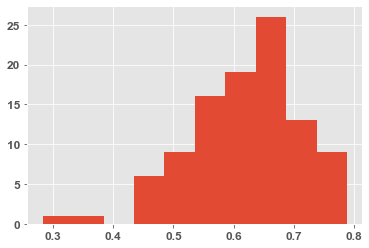

In [43]:
plt.hist(r2_test)

In [44]:
#the std
STD_bs=np.std(C,axis=1)

bootstrap_preds_original=np.array(bootstrap_preds_original)
PICP_df = pd.DataFrame()
PICP_df['PICP results']=[]

for i in range(bootstrap_preds_original.shape[1]):
    PICP_thisobs=0
    for j in range(bootstrap_preds_original.shape[0]):
        if abs(bootstrap_preds_original[j,i]-preds_test[i])<=STD_bs[i]:
            PICP_thisobs+=1
    PICP_df.loc[i,'PICP results']=PICP_thisobs/bootstrap_preds_original.shape[0]
    
PICP=PICP_df['PICP results'].mean()
print('PI coverage probability: ',PICP)
print('MPIW_all',np.mean(STD_bs))
print('MPIW_model_only',np.mean(np.std(bootstrap_preds_original,axis=0)))

PI coverage probability:  0.824864864864865
MPIW_all 0.0205908326057516
MPIW_model_only 0.01551515153540517


In [45]:
df_test['PI_all']=STD_bs
df_test['PI_model']=np.std(bootstrap_preds_original,axis=0)
df_test['Predicted']=preds_test
df_test

,Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,Channel Length (um),Channel Width (mm),Aged,OFET Configuration_BGBC,OFET Configuration_BGTC,Deposition Method_DIPPED,Deposition Method_DROPPED,Deposition Method_SPUN,Mobility (cm^2/V-s),PI_all,PI_model,Predicted
0,62.050,1.7000,5.0,334.000,3.629738,1,0,5.0,40.0,0,1,0,0,0,1,0.009080,0.024331,0.021034,0.014494
1,47.700,1.9875,4.0,334.000,3.629738,0,0,50.0,2.0,0,1,0,0,0,1,0.015300,0.014479,0.007750,0.024976
2,10.800,1.2000,5.0,334.000,3.629738,1,0,5.0,40.0,0,1,0,0,0,1,0.000356,0.013448,0.005593,0.008278
3,76.000,1.7000,10.0,487.000,3.352462,1,1,2.0,10.0,1,1,0,0,0,1,0.137800,0.017478,0.012487,0.147912
4,25.650,1.3500,15.0,334.000,3.629738,1,0,100.0,148.5,0,0,1,1,0,0,0.010600,0.021539,0.017731,0.006495
5,52.000,2.3000,10.0,334.000,3.629738,1,1,20.0,10.0,1,1,0,0,1,0,0.066200,0.031690,0.029235,0.063466
6,47.700,1.9875,3.0,334.000,3.629738,0,0,200.0,0.5,0,1,0,0,0,1,0.003810,0.039088,0.037125,0.027233
7,60.750,2.2500,1.0,334.000,3.629738,0,0,20.0,9.0,0,1,0,1,0,0,0.017000,0.026234,0.023209,0.020523
8,76.000,1.7000,10.0,487.000,3.352462,1,1,20.0,10.0,1,1,0,0,0,1,0.122600,0.018876,0.014378,0.105829
9,91.481,2.2700,5.0,403.480,2.649001,0,0,50.0,2.0,0,1,0,0,0,1,0.000254,0.015561,0.009622,0.001425


In [ ]:
#Saving the test results with the prediction intervals
df_test.to_csv('P3HT_testdata_WithPI.csv')

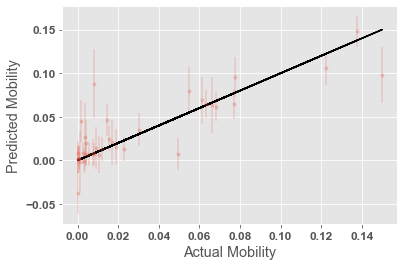

In [47]:
fig, ax = plt.subplots()
ax.errorbar(Y_test, preds_test, yerr=STD_bs, fmt='.',alpha=0.2)
ax.plot(Y_test,Y_test,color='black')
plt.xlabel('Actual Mobility')
plt.ylabel('Predicted Mobility')
plt.savefig('Mobility_best_allPI.png')

The PI from all the sources is shown in the plot above

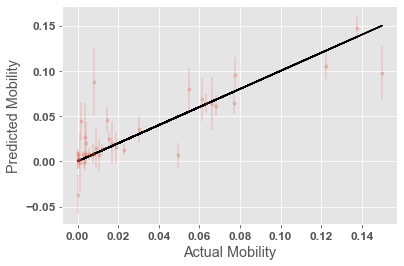

In [46]:
fig, ax = plt.subplots()
ax.errorbar(Y_test, preds_test, yerr=np.std(bootstrap_preds_original,axis=0), fmt='.',alpha=0.2)
ax.plot(Y_test,Y_test,color='black')
plt.xlabel('Actual Mobility')
plt.ylabel('Predicted Mobility')
plt.savefig('Mobility_best_model.png')

The PI only from the model variance is shown in the plot above

## P3HT Mobility Model Intepretation Using SHAP

### Useful links for SHAP :

1. https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
2. https://github.com/slundberg/shap
3. https://shap.readthedocs.io/en/latest/index.html
4.https://www.yourdatateacher.com/2021/05/17/how-to-explain-neural-networks-using-shap/

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).

In [48]:
import shap
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

In [50]:
#X_train_summary = shap.kmeans(df_X_train, 10) #sing shap.kmeans(data, K) to summarize the background as K weighted samples.This helps reduce the time taken to get the shap values

explainer = shap.KernelExplainer(clf_3.predict, df_X_train,random_state=1234)
shap_values = explainer.shap_values(df_X_test)

Using 109 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/37 [00:00<?, ?it/s]

### Plot - 1 : Variable Importance Plot - Global interpretability

The shap.summary_plot function with plot_type=”bar” let you produce the variable importance plot. A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

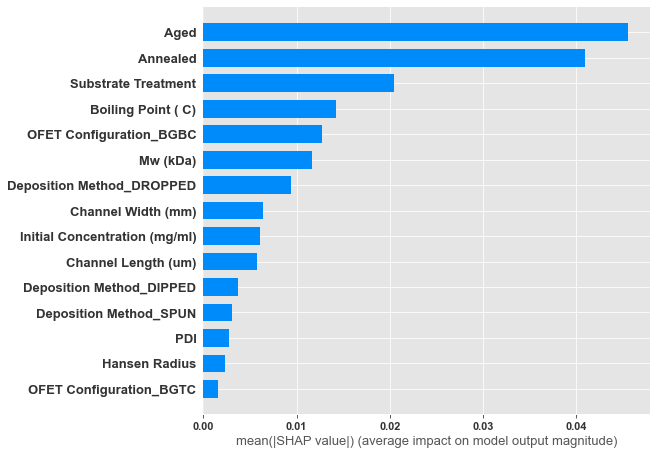

In [51]:
shap.summary_plot(shap_values, df_X_test, plot_type="bar")



To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low).

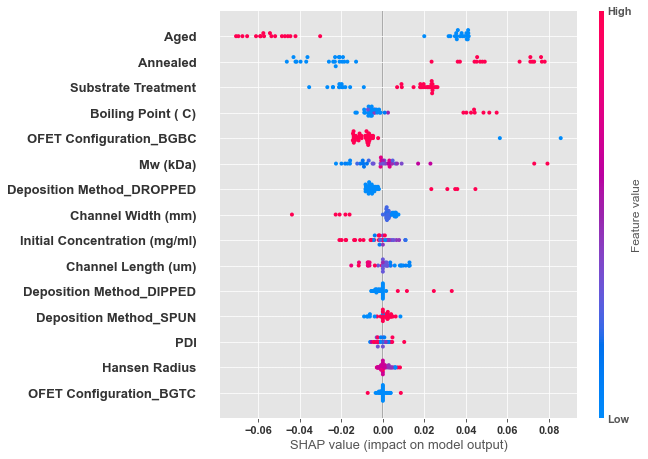

In [52]:
shap.summary_plot(shap_values, df_X_test)

### What we can get from a summary plot : 

Feature importance: Variables are ranked in descending order.

Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

Correlation: 

Now lets plot a more simplified version of the summary plot for easier interpretation. It highlights the correlations in colors. The red color means a feature is positively correlated with the target variable.

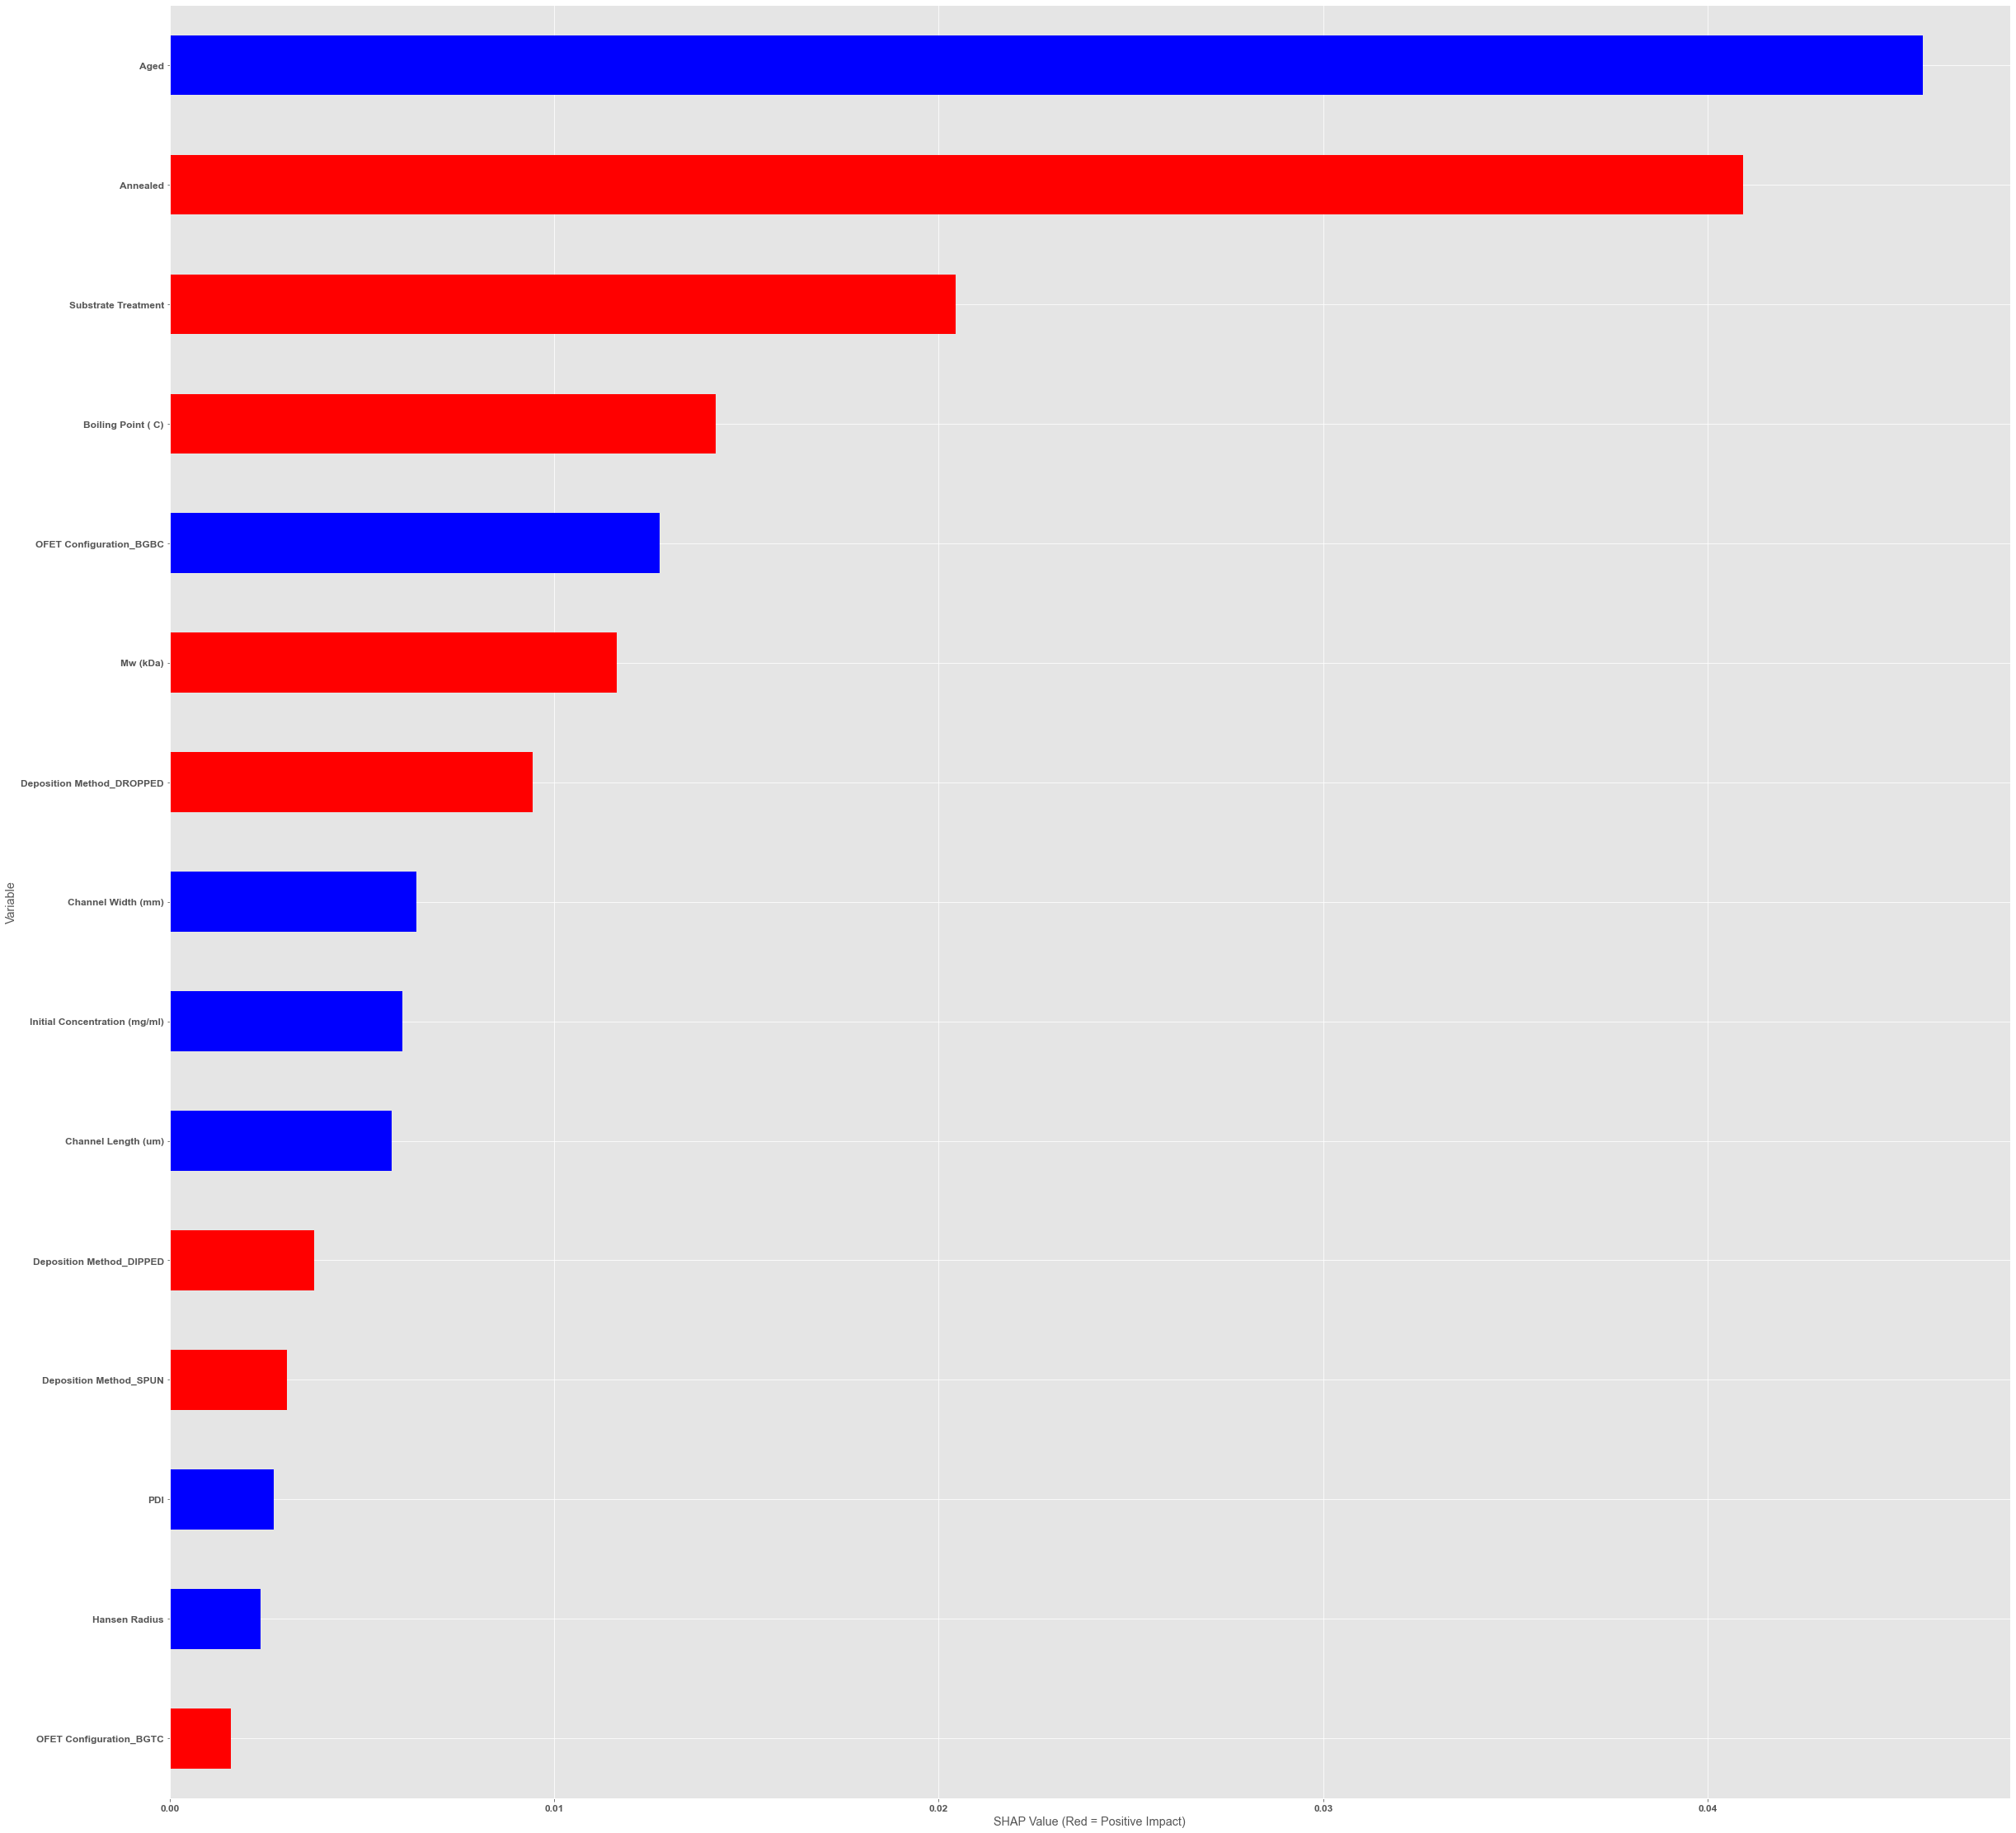

In [53]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index()#.drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(40,40),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,df_X_test) 

### Plot 2 : SHAP dependance plot - global interpretability

The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

The function automatically includes another variable that your chosen variable interacts most with.

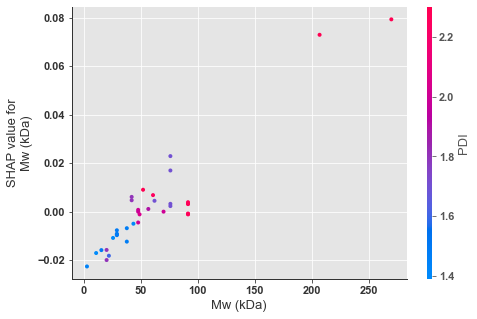

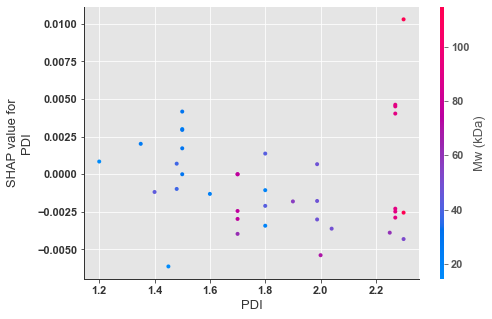

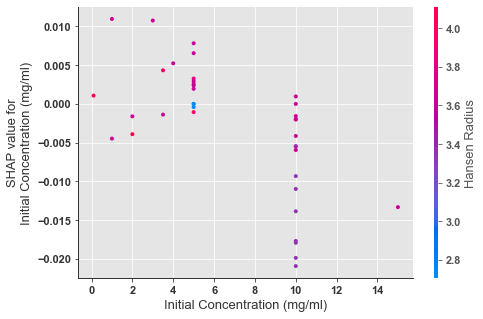

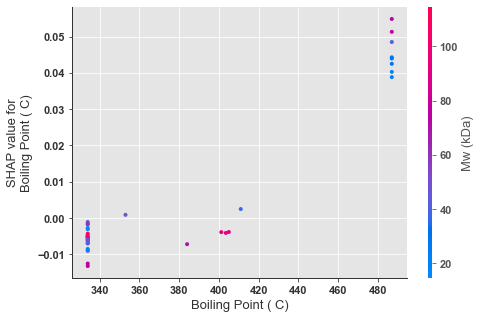

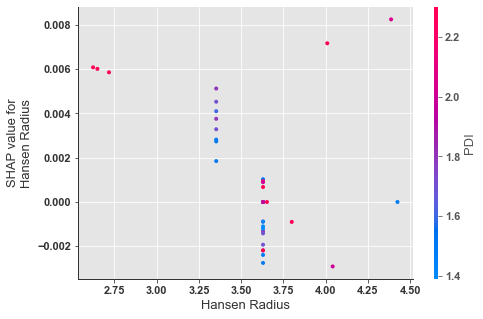

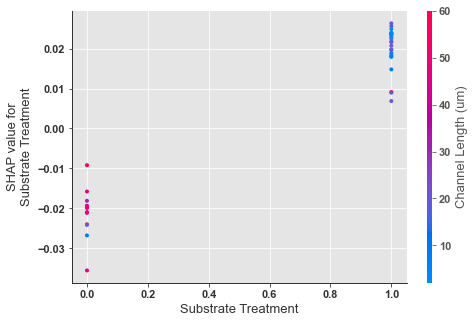

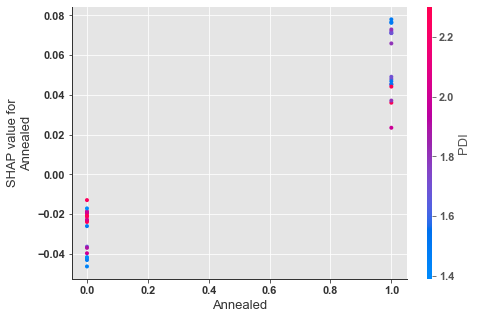

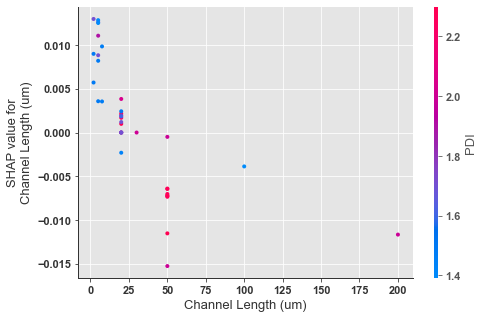

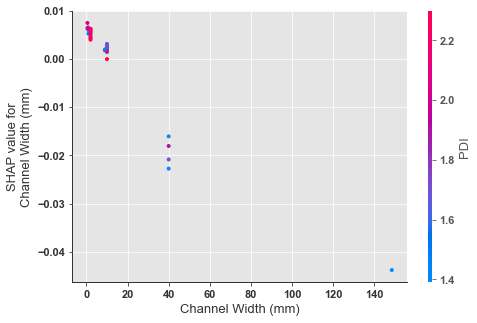

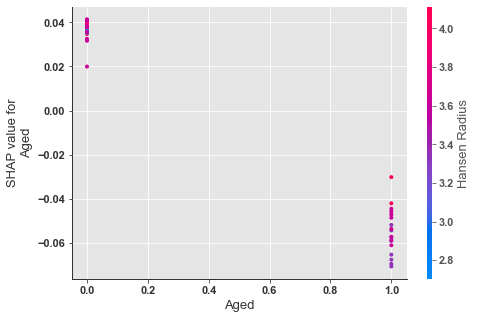

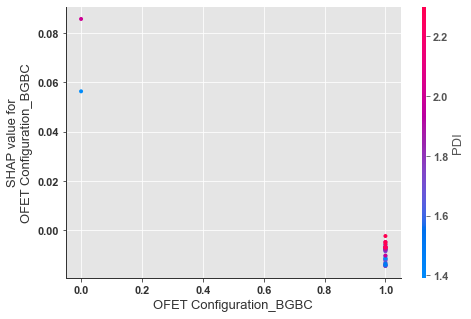

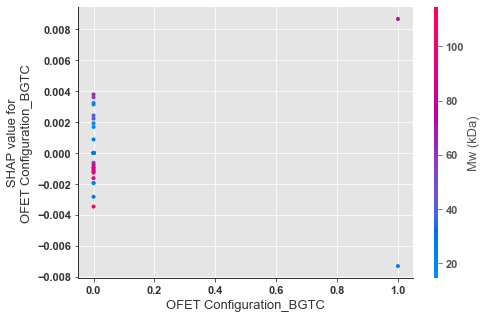

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


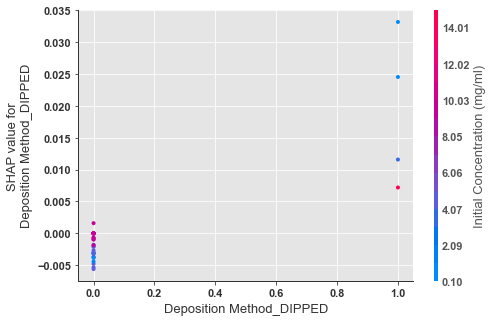

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


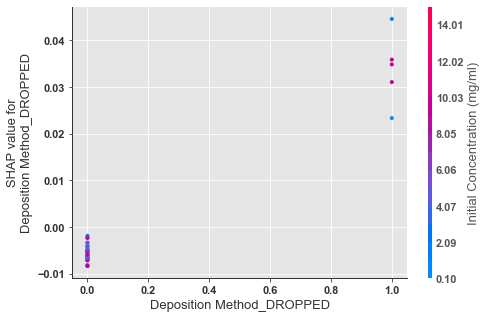

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


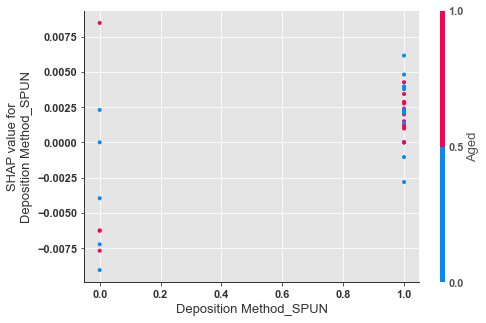

In [54]:
for name in df_X_test.columns:
    shap.dependence_plot(name, shap_values, df_X_test)

### Plot 3 : Individual SHAP Value Plots - Local interpretability

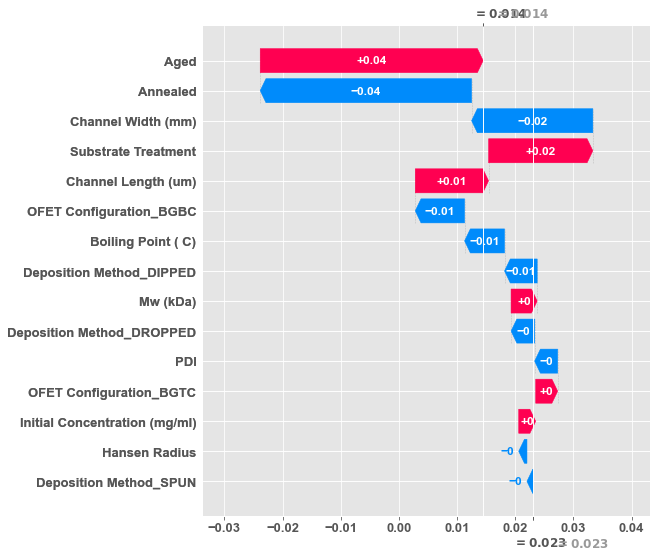

In [55]:
#shap.plots._waterfall.waterfall_legacy(expected_value, shap_values, features, feature_names, max_display)
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names=df_X_test.columns,max_display=20)


In [56]:
preds_test[0]

0.014493541624693226

The output value is the prediction for that observation (the prediction of the first row in test is 0.0145).

The base value: The value that would be predicted if we did not know any features for the current output. In other words, it is the mean prediction, or mean(yhat). The mean prediction of Y_test is 0.023.
    
Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.
    




In [57]:
#Values of each feature for the first test row
df_X_test.head(1)

,Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,Channel Length (um),Channel Width (mm),Aged,OFET Configuration_BGBC,OFET Configuration_BGTC,Deposition Method_DIPPED,Deposition Method_DROPPED,Deposition Method_SPUN
0,62.05,1.7,5.0,334.0,3.629738,1,0,5.0,40.0,0,1,0,0,0,1


In [58]:
#Average values for each feature
df_X_test.mean()

Mw (kDa)                          61.053811
PDI                                1.833311
Initial Concentration (mg/ml)      6.759459
Boiling Point ( C)               376.635270
Hansen Radius                      3.560096
Substrate Treatment                0.648649
Annealed                           0.459459
Channel Length (um)               29.621622
Channel Width (mm)                13.737838
Aged                               0.486486
OFET Configuration_BGBC            0.945946
OFET Configuration_BGTC            0.054054
Deposition Method_DIPPED           0.108108
Deposition Method_DROPPED          0.135135
Deposition Method_SPUN             0.756757
dtype: float64

### The force plot

Another way of showing the waterfall plot with the same interpretation is shown below. 

The wider the feature means more contribution it has to shifting the predicted value

In [59]:
shap.force_plot(explainer.expected_value, shap_values[0],feature_names=df_X_test.columns)

If we take many force plot explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

In [60]:
shap.force_plot(explainer.expected_value, shap_values, feature_names=df_X_test.columns)

## SHAP interpretation on Prediction Intervals

We look into the most important features influencing the prediction intervals. A set of functions are developed for SHAP analysis using kernel explainer. <br>

The generation of PI is slightly different from the previous process. 
 1. The number of bootstrap was brought down to 50 to speed up the process. This change will not influence the average width of prediction intervals. We also suggest that the number of bootstrap should not be smaller than the sqaure root of the number of training data points, or the process will likely underestimate the uncertainty.
 2. We have the 50 bootstarp model ready first. In SHAP analysis, test datapoints are analyzed one by one not entirely. If we don't have the models ready, ~500(number of test datapoints)* 50 bootstrap models will be trained, significantly increasing the computation time.
 
The process will take ~10hrs after the two changes have been made. Estimated time will be given by the SHAP explainer.
 

In [50]:
nbootstraps=50
#get a list of BS names
BS_model_list=[]
for i in range(nbootstraps):
    BS_model_list.append('BS_model_'+str(i))

We generate the 50 models and calculate the validation residuals in the block below.

In [51]:
def BS_model_generation():
    n = X_train.shape[0]

    val_residuals= pd.DataFrame(None, index=range(X_train.shape[0]), columns=range(nbootstraps))

    for b in range(nbootstraps):
        print('No. bootstrap:',b)
        
        # run the regressor model to make sure it's reset
        model=regressor_reset()
        
        train_idxs = np.random.choice(range(n), size = n, replace = True)
        val_idxs = np.array([idx for idx in range(n) if idx not in train_idxs])
        globals()[BS_model_list[b]]=model.fit(X_train[train_idxs, :], Y_train[train_idxs])
        val_residuals.iloc[val_idxs,b]=Y_train[val_idxs] - model.predict(X_train[val_idxs, :])
        
    return val_residuals

In [55]:
val_residuals=BS_model_generation()
val_residuals=val_residuals.mean(axis=1)

No. bootstrap: 0


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 1


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 2


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 3


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 4


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 5


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 6


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 7


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 8


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 9


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 10


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 11


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 12


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 13


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 14


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 15


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 16


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 17


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 18


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 19


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 20


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 21


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 22


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 23


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 24


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 25


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 26


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 27


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 28


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 29


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 30


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 31


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 32


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 33


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 34


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 35


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 36


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 37


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 38


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 39


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 40


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 41


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 42


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 43


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 44


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 45


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 46


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 47


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 48


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


No. bootstrap: 49


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


original train r2 0.3693124992133445
original test r2 0.3900494951579491
JMP parameter train r2 0.9247987565481195
JMP parameter r2 0.858074961814248


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha 0.001 after fitting train r2 0.932095193048294
alpha 0.001 after fitting test r2 0.8573400993946403


C:\Users\UB04230\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The train residuals and the overall error from model bias and sample noise are calculated.

In [58]:
n = X_train.shape[0]

# train residuals
train_residuals = Y_train - preds
#Compute the o_i's, model bias and sample noise simple version
no_information_error = 0
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[0]):
        no_information_error+=(Y_train[i]-preds[j])**2
no_information_error=no_information_error/n/n
generalisation = np.abs(val_residuals.mean() - train_residuals.mean())
no_information_val = np.mean(np.abs(no_information_error - train_residuals))
relative_overfitting_rate = generalisation / no_information_val
weight = .632 / (1 - .368 * relative_overfitting_rate)
residuals = (1 - weight) * train_residuals + weight * val_residuals

In [59]:
#bootstrapping method to get the PI

def prediction_interval_bs_no_info(X_test):
    #global X_train,val_residuals

    # Compute the m_b's, model variance
    bootstrap_preds_original= []
    for b in range(nbootstraps):        
        model=globals()[BS_model_list[b]]
        bootstrap_preds_original.append(model.predict(X_test))#give predictions of the whole test set
    #calculate the mean of the dataset
    mean_bootstrap_preds=np.mean(bootstrap_preds_original,axis=0) 
    bootstrap_preds = bootstrap_preds_original-mean_bootstrap_preds#minus average prediction
    print('test data shape',X_test.shape)
    
    #Calculate the C set convovling both model variance and model bias, sample noise error
    C = pd.DataFrame(None, index=range(X_test.shape[0]), columns=range(X_train.shape[0]*nbootstraps))
    for i in range(X_train.shape[0]):
        C.iloc[:,i*nbootstraps:nbootstraps*(i+1)]=bootstrap_preds.T+residuals[i]
    
    return C

In [60]:
def get_PI(X_test):
    #Std is the prediction interval width we report
    C=prediction_interval_bs_no_info(X_test)
    STD_bs_new=np.std(C,axis=1) 
    print('finished PI calculation')
    return STD_bs_new

In [63]:
X_train_summary = shap.kmeans(X_train, 5)

explainer = shap.KernelExplainer(get_PI, X_train_summary)

test data shape (5, 53)
finished PI calculation


 **nsamples** is the number of times to re-evaluate the model when explaining each prediction. More samples lead to lower variance estimates of the SHAP values. 

The default setting of **nsamples** is 2 * X.shape[1] + 2048. This means the data matrix generated for one prediction in the test set has a size of ((2 * X_test.shape[1] + 2048 ) * 5 , X_test.shape[1]) (in this case (10670, 53), and 5 in the expression is size decided in the step shap.kmeans(X_train, 5)).


After the bootstrap method, the dataset will be as large as (10670, X_train.shape[0]* nbootstraps = 118,200). Computers will not have enough memory to calculate the standard deviation of this, and we need to control the size of **nsamples** since  
X_train.shape[0]* nbootstraps = 118,200 will not change (this is why we reduce nbootstraps and try to speed up the process).


After we set **nsamples**, it will still take **10hrs** to complete the calculation. If this number is too small, the calculation is not reliable and warning may appear saying the process is not fully converged.

Helpful link:
    https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html

In [ ]:
shap_values = explainer.shap_values(X_test,nsamples=100)


  0%|          | 0/481 [00:00<?, ?it/s]

test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 53)
finished PI calculation
test data shape (500, 53)
finished PI calculation
test data shape (1, 

### Plot - 1 : Variable Importance Plot - Global interpretability

The shap.summary_plot function with plot_type=”bar” let you produce the variable importance plot. A variable importance plot lists the most significant variables in descending order.

In [ ]:
shap.summary_plot(shap_values, df_X_test, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, df_X_test)

Explanation

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index()#.drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(40,40),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,df_X_test) 

### Plot 2 : SHAP dependance plot - global interpretability

The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

The function automatically includes another variable that your chosen variable interacts most with.

In [ ]:
for name in df_X_test.columns:
    shap.dependence_plot(name, shap_values, df_X_test)

### Plot 3 : Individual SHAP Value Plots - Local interpretability

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names=df_X_test.columns,max_display=20)


Explanation

### The force plot

Another way of showing the waterfall plot with the same interpretation is shown below. 

The wider the feature means more contribution it has to shifting the predicted value

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0],feature_names=df_X_test.columns)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, feature_names=df_X_test.columns)